In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

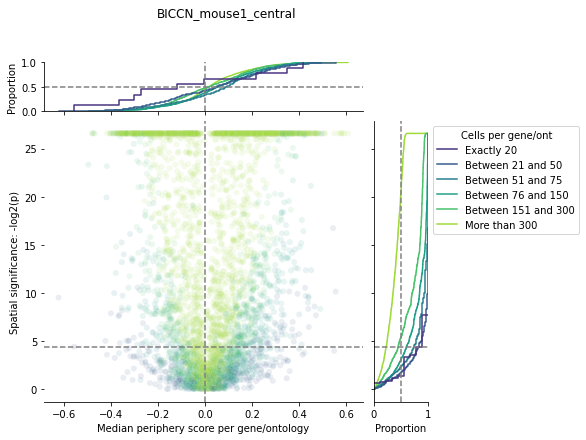

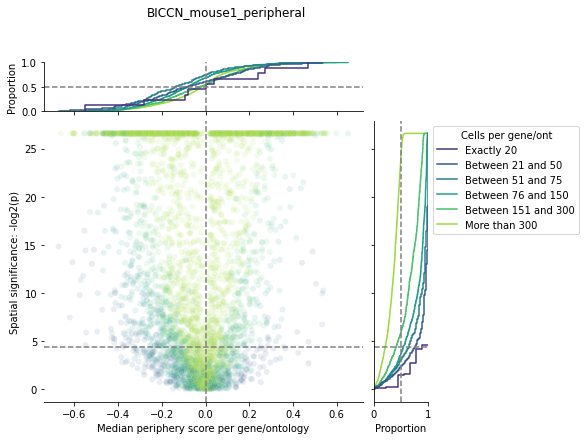

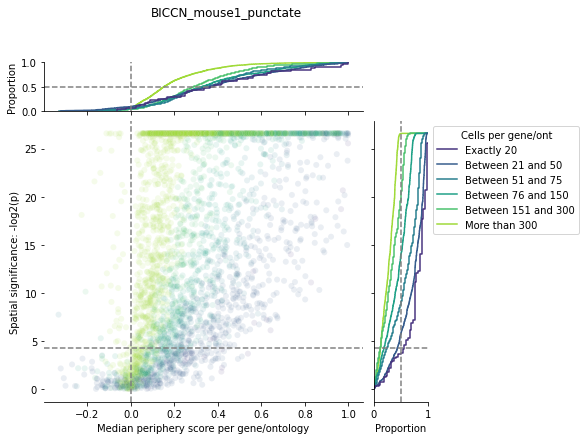

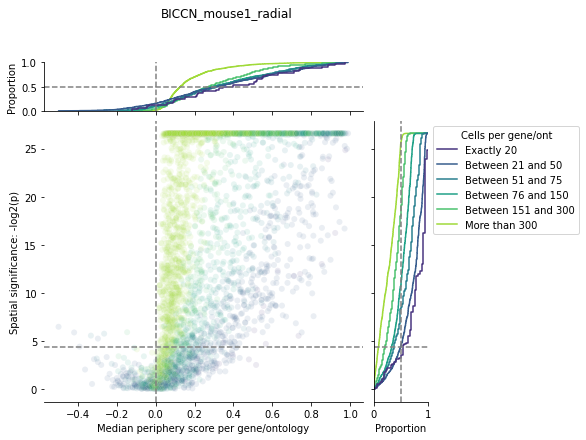

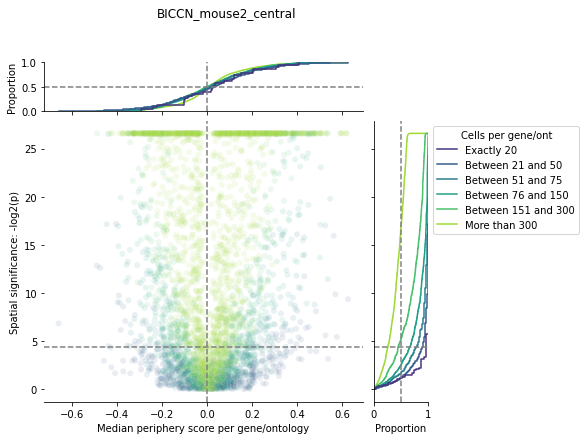

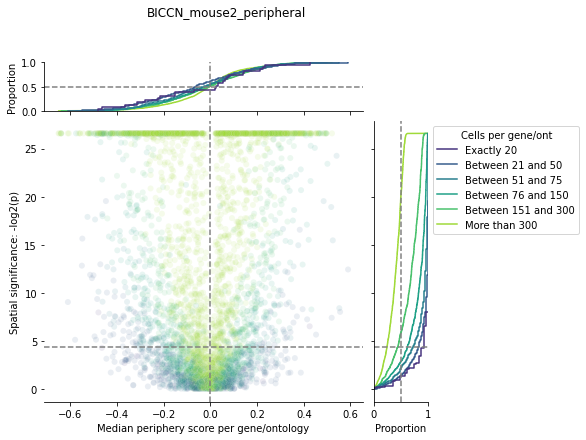

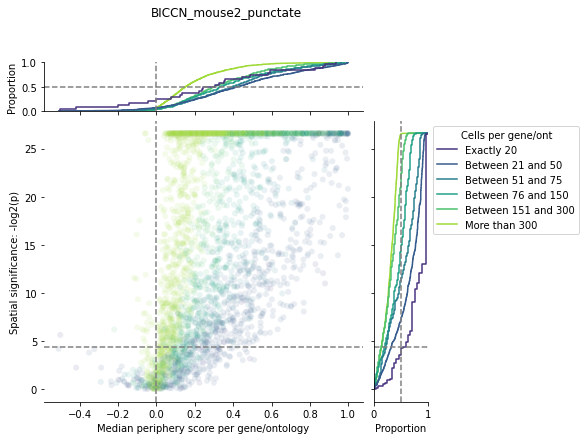

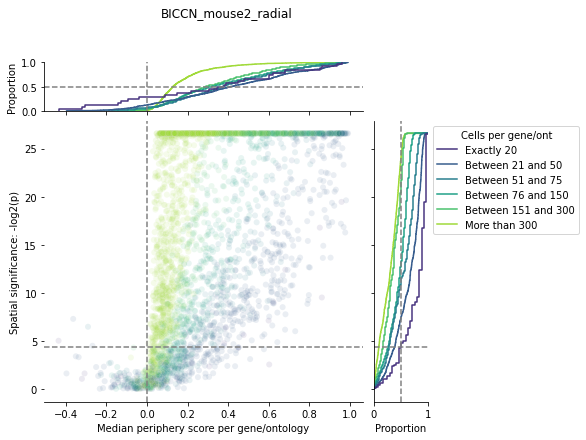

In [5]:
#################################
#
#   Effect on cells per ont on score and significance
#
#################################

gene_ont_samples = sorted(glob.glob('../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/*.csv'))

for p in gene_ont_samples:
    name = os.path.basename(p).replace('_gene_ont.csv','')
    
    df = pd.read_csv(p)
    df['bh_p'] += 1e-8
    
    vp_df = df.copy()
    vp_df['Spatial significance: -log2(p)'] = -np.log2(vp_df['bh_p']) 

    vp_df.loc[vp_df['num_cells'] == 20, 'Cells per gene/ont'] = 'Exactly 20'
    vp_df.loc[vp_df['num_cells'].between(21,50), 'Cells per gene/ont'] = 'Between 21 and 50'
    vp_df.loc[vp_df['num_cells'].between(51,75), 'Cells per gene/ont'] = 'Between 51 and 75'
    vp_df.loc[vp_df['num_cells'].between(76,150), 'Cells per gene/ont'] = 'Between 76 and 150'
    vp_df.loc[vp_df['num_cells'].between(151,300), 'Cells per gene/ont'] = 'Between 151 and 300'
    vp_df['Cells per gene/ont'] = vp_df['Cells per gene/ont'].fillna('More than 300')

    hue_order = [
        'Exactly 20',
        'Between 21 and 50',
        'Between 51 and 75',
        'Between 76 and 150',
        'Between 151 and 300',
        'More than 300',
    ]


    g = sns.JointGrid(marginal_ticks=True)

    sns.scatterplot(
        x = 'med_score',
        y = 'Spatial significance: -log2(p)',
        hue = 'Cells per gene/ont',
        hue_order = hue_order,
        palette = 'viridis',
        alpha = 0.1,
        data = vp_df,
        legend = False,
        ax = g.ax_joint,
    )

    sns.ecdfplot(
        x = 'med_score',
        hue = 'Cells per gene/ont',
        hue_order = hue_order,
        palette = 'viridis',
        data = vp_df,
        legend = False,
        ax=g.ax_marg_x,
    )

    sns.ecdfplot(
        y = 'Spatial significance: -log2(p)',
        hue = 'Cells per gene/ont',
        hue_order = hue_order,
        palette = 'viridis',
        data = vp_df,
        #legend = False,
        ax=g.ax_marg_y,
    )

    #Show significance cutoff line -np.log2(0.05) ~= 4.32
    g.ax_joint.axhline(4.32, linestyle = 'dashed', color = 'grey')
    g.ax_marg_y.axhline(4.32, linestyle = 'dashed', color = 'grey')

    #Vertical line at 0 median score
    g.ax_joint.axvline(0, linestyle = 'dashed', color = 'grey')
    g.ax_marg_x.axvline(0, linestyle = 'dashed', color = 'grey')

    #Lines at 0.5 in the margins for the eCDFs
    g.ax_marg_x.axhline(0.5, linestyle = 'dashed', color = 'grey')
    g.ax_marg_y.axvline(0.5, linestyle = 'dashed', color = 'grey')

    g.fig.suptitle(
        """{}
        """.format(name)
    )
    g.fig.subplots_adjust(top=0.85)
    g.ax_joint.set_xlabel('Median periphery score per gene/ontology')
    g.ax_joint.spines['left'].set_visible(False)

    #g.savefig('tpm_spatial_corrs/expressed_vs_unexpressed_peripheral_scoring_ecdf.svg')
    sns.move_legend(g.ax_marg_y, "upper left", bbox_to_anchor=(1, 1))
    plt.show(g)
    plt.close()
    

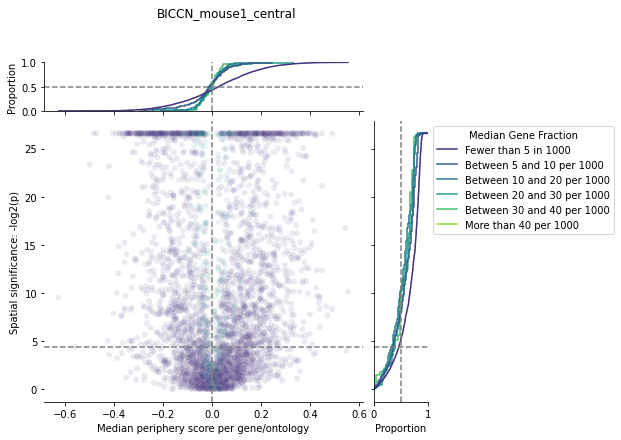

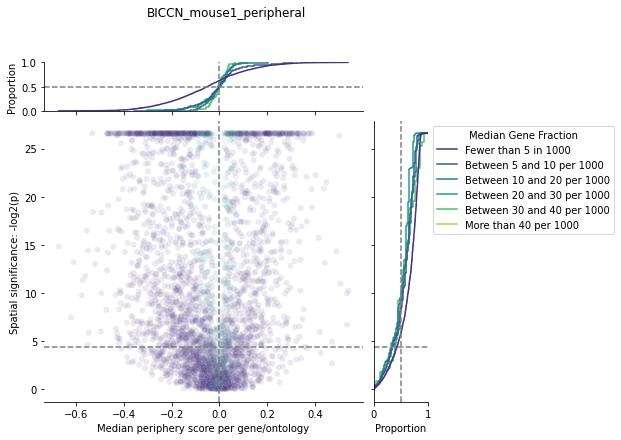

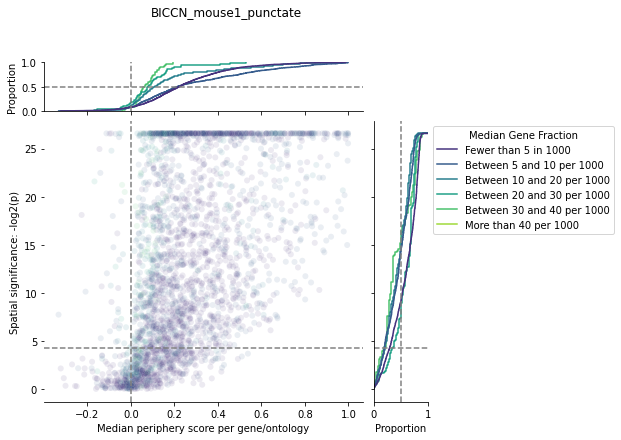

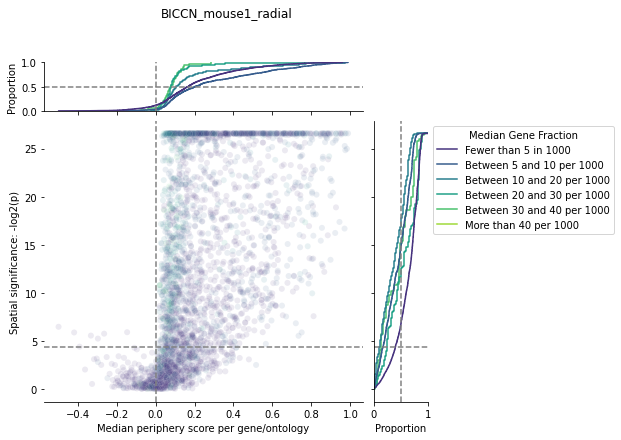

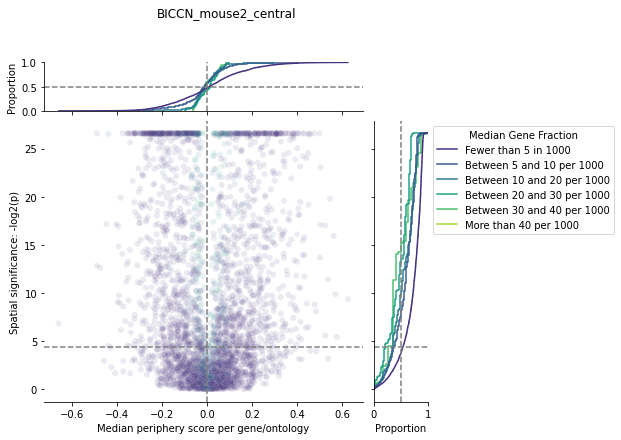

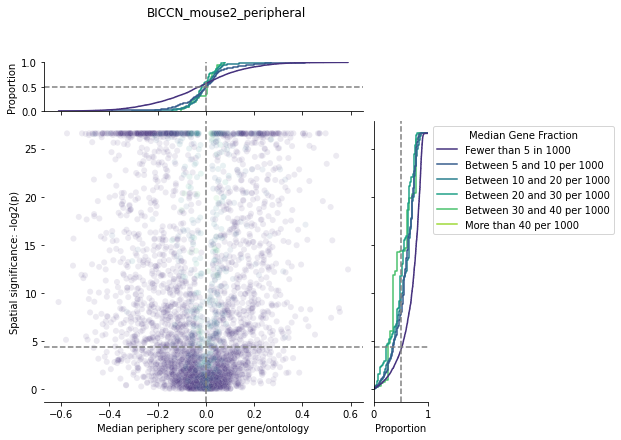

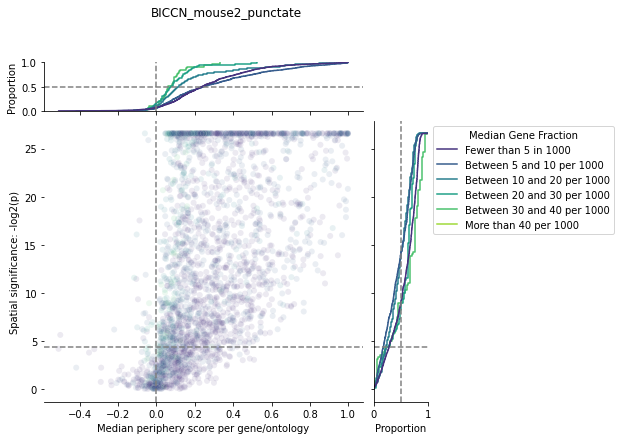

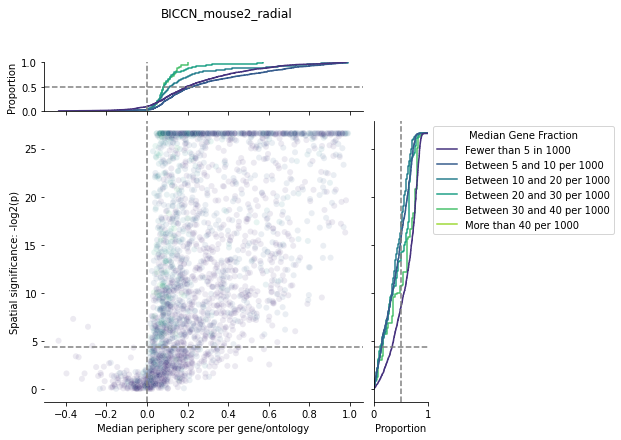

In [6]:
#################################
#
#   Effect on median gene/fraction per ont on score and significance
#
#################################

gene_ont_samples = sorted(glob.glob('../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/*'))

for p in gene_ont_samples:
    df = pd.read_csv(p)
    df['bh_p'] += 1e-8
    
    name = os.path.basename(p).replace('_gene_ont.csv','')
    
    #avoiding -infs by filtering out gene/onts with pvals in the 10th quantile
    p_thresh = df['bh_p'].quantile(0.1)
    vp_df = df[df['bh_p'].gt(p_thresh)].copy()
    vp_df['Spatial significance: -log2(p)'] = -np.log2(vp_df['bh_p'])

    vp_df['med_gene_frac'] = vp_df['med_gene_spots'].div(vp_df['med_spots'])
    
    vp_df.loc[vp_df['med_gene_frac'] < 0.005, 'Median Gene Fraction'] = 'Fewer than 5 in 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.005,0.010), 'Median Gene Fraction'] = 'Between 5 and 10 per 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.010,0.020), 'Median Gene Fraction'] = 'Between 10 and 20 per 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.020,0.030), 'Median Gene Fraction'] = 'Between 20 and 30 per 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.030,0.040), 'Median Gene Fraction'] = 'Between 30 and 40 per 1000'
    vp_df['Cells per gene/ont'] = vp_df['Median Gene Fraction'].fillna('More than 40 per 1000')

    hue_order = [
        'Fewer than 5 in 1000',
        'Between 5 and 10 per 1000',
        'Between 10 and 20 per 1000',
        'Between 20 and 30 per 1000',
        'Between 30 and 40 per 1000',
        'More than 40 per 1000',
    ]


    g = sns.JointGrid(marginal_ticks=True)

    sns.scatterplot(
        x = 'med_score',
        y = 'Spatial significance: -log2(p)',
        hue = 'Median Gene Fraction',
        hue_order = hue_order,
        palette = 'viridis',
        alpha = 0.1,
        data = vp_df,
        legend = False,
        ax = g.ax_joint,
    )

    sns.ecdfplot(
        x = 'med_score',
        hue = 'Median Gene Fraction',
        hue_order = hue_order,
        palette = 'viridis',
        data = vp_df,
        legend = False,
        ax=g.ax_marg_x,
    )

    sns.ecdfplot(
        y = 'Spatial significance: -log2(p)',
        hue = 'Median Gene Fraction',
        hue_order = hue_order,
        palette = 'viridis',
        data = vp_df,
        #legend = False,
        ax=g.ax_marg_y,
    )

    #Show significance cutoff line -np.log2(0.05) ~= 4.32
    g.ax_joint.axhline(4.32, linestyle = 'dashed', color = 'grey')
    g.ax_marg_y.axhline(4.32, linestyle = 'dashed', color = 'grey')
    g.ax_marg_y.axvline(0.5, linestyle = 'dashed', color = 'grey')

    #Vertical line at 0 median score
    g.ax_joint.axvline(0, linestyle = 'dashed', color = 'grey')
    g.ax_marg_x.axvline(0, linestyle = 'dashed', color = 'grey')
    g.ax_marg_x.axhline(0.5, linestyle = 'dashed', color = 'grey')


    g.fig.suptitle(
        """{}
        """.format(name)
    )
    g.fig.subplots_adjust(top=0.85)
    g.ax_joint.set_xlabel('Median periphery score per gene/ontology')
    g.ax_joint.spines['left'].set_visible(False)

    #g.savefig('tpm_spatial_corrs/expressed_vs_unexpressed_peripheral_scoring_ecdf.svg')
    sns.move_legend(g.ax_marg_y, "upper left", bbox_to_anchor=(1, 1))
    plt.show(g)
    plt.close()
    
  

# Permuted vs direct radial punctate score distributions

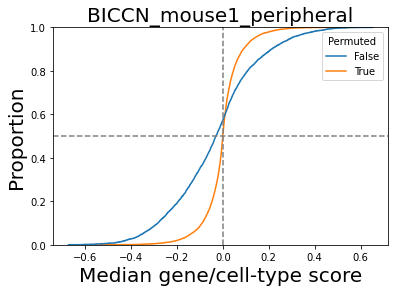

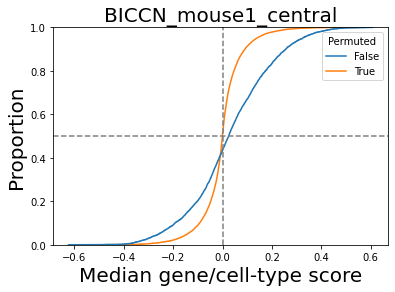

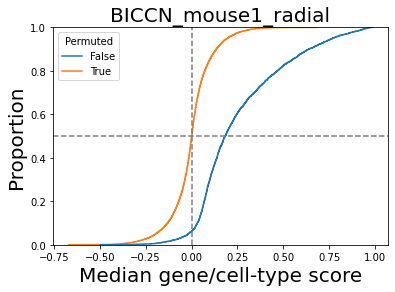

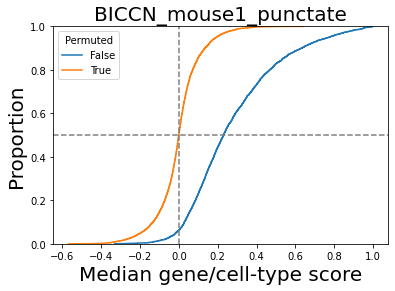

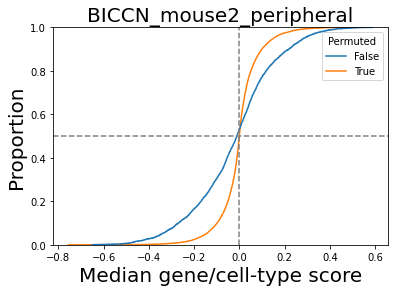

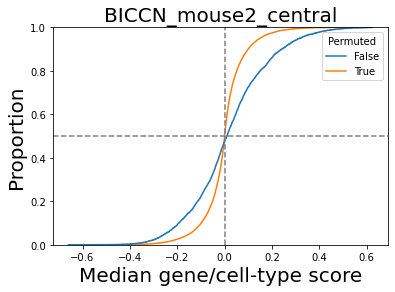

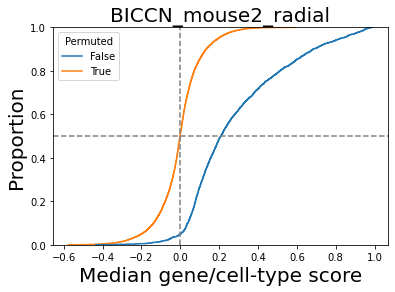

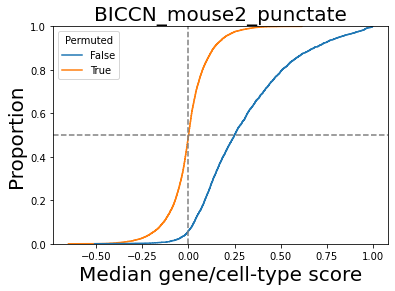

In [22]:
samples = [
    'BICCN_mouse1_peripheral','BICCN_mouse1_central','BICCN_mouse1_radial','BICCN_mouse1_punctate',
    'BICCN_mouse2_peripheral','BICCN_mouse2_central','BICCN_mouse2_radial','BICCN_mouse2_punctate',
]

for sample in samples:
    perm_sample = glob.glob('../../nf_pipeline/outputs/SRRS_20220531_permuted/gene_ont/'+sample+'*')[0]
    dir_sample = glob.glob('../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/'+sample+'*')[0]
    
    perm_df = pd.read_csv(perm_sample)
    perm_df['Permuted'] = True
    dir_df = pd.read_csv(dir_sample)
    dir_df['Permuted'] = False
    
    df = pd.concat((perm_df,dir_df),ignore_index=True)
    sns.ecdfplot(
        x = 'med_score',
        hue = 'Permuted',
        data = df,
    )
    plt.axvline(0,linestyle='dashed',color='grey')
    plt.axhline(0.5,linestyle='dashed',color='grey')
    plt.title(sample,fontsize=20)
    #plt.legend(fontsize=20)
    plt.xlabel('Median gene/cell-type score',fontsize=20)
    plt.ylabel('Proportion',fontsize=20)
    plt.show()
    plt.close()
    

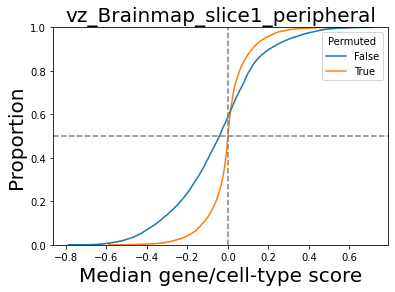

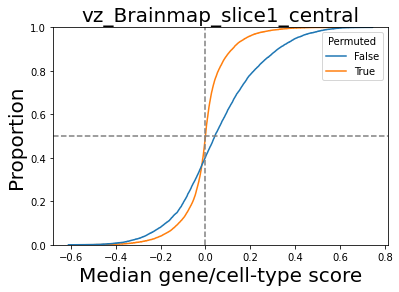

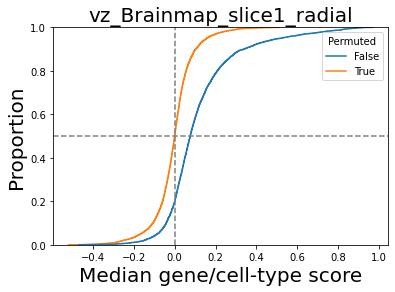

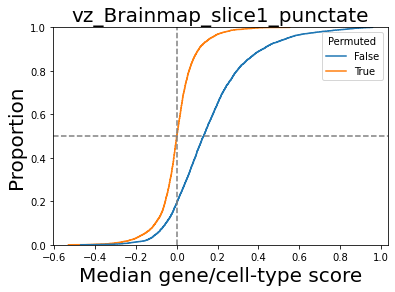

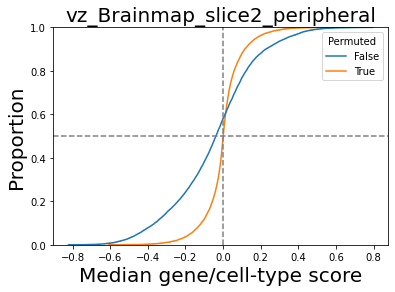

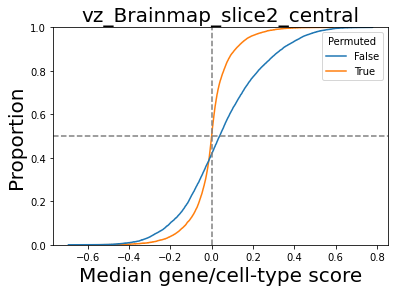

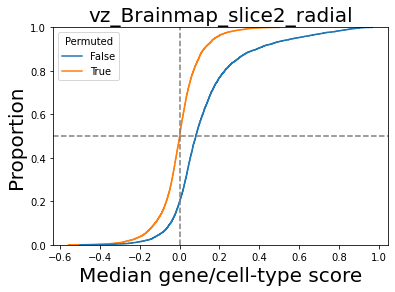

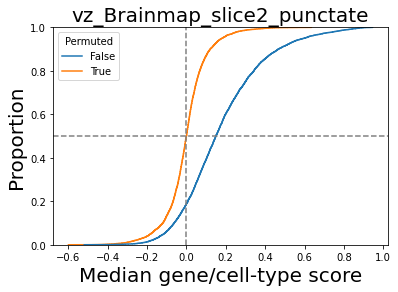

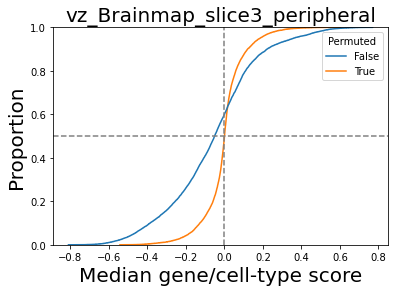

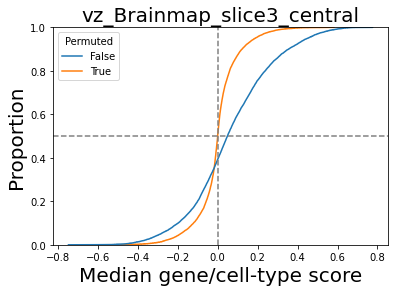

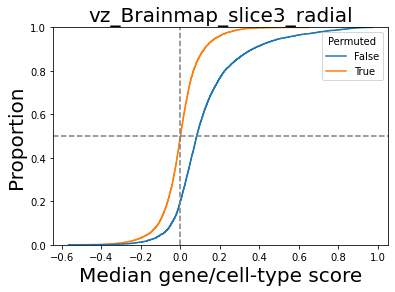

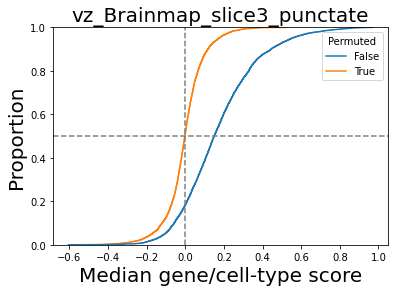

In [25]:
samples = [
    'vz_Brainmap_slice1_peripheral','vz_Brainmap_slice1_central','vz_Brainmap_slice1_radial','vz_Brainmap_slice1_punctate',
    'vz_Brainmap_slice2_peripheral','vz_Brainmap_slice2_central','vz_Brainmap_slice2_radial','vz_Brainmap_slice2_punctate',
    'vz_Brainmap_slice3_peripheral','vz_Brainmap_slice3_central','vz_Brainmap_slice3_radial','vz_Brainmap_slice3_punctate',
]

for sample in samples:
    perm_sample = glob.glob('../../nf_pipeline/outputs/SRRS_20220531_permuted/gene_ont/'+sample+'*')[0]
    dir_sample = glob.glob('../../nf_pipeline/outputs/vz_Brainmap_20220602_direct/gene_ont/'+sample+'*')[0]
    
    perm_df = pd.read_csv(perm_sample)
    perm_df['Permuted'] = True
    dir_df = pd.read_csv(dir_sample)
    dir_df['Permuted'] = False
    
    df = pd.concat((perm_df,dir_df),ignore_index=True)
    sns.ecdfplot(
        x = 'med_score',
        hue = 'Permuted',
        data = df,
    )
    plt.axvline(0,linestyle='dashed',color='grey')
    plt.axhline(0.5,linestyle='dashed',color='grey')
    plt.title(sample,fontsize=20)
    #plt.legend(fontsize=20)
    plt.xlabel('Median gene/cell-type score',fontsize=20)
    plt.ylabel('Proportion',fontsize=20)
    plt.show()
    plt.close()
    

In [7]:

dir_df

experiment sample  metric           gene annotation  num_cells  \
0     BICCN_mouse1   m1s1  periph  1700022I11Rik      Astro         43   
1     BICCN_mouse1   m1s1  periph  1700022I11Rik     L23_IT       1278   
2     BICCN_mouse1   m1s1  periph  1700022I11Rik     L56_NP         63   
3     BICCN_mouse1   m1s1  periph  1700022I11Rik      L5_ET        281   
4     BICCN_mouse1   m1s1  periph  1700022I11Rik      L5_IT        652   
...            ...    ...     ...            ...        ...        ...   
4638  BICCN_mouse1   m1s1  periph        Zfp804b        SMC        111   
4639  BICCN_mouse1   m1s1  periph        Zfp804b       Sncg         47   
4640  BICCN_mouse1   m1s1  periph        Zfp804b        Sst        294   
4641  BICCN_mouse1   m1s1  periph        Zfp804b       VLMC        210   
4642  BICCN_mouse1   m1s1  periph        Zfp804b        Vip        344   

      med_gene_spots  med_spots  med_score         z             p  \
0                1.0      240.0  -0.178218 -0.652896  5.138235e-01   
1                1.0      587.0  -0.119332 -6.225368  4.804270e-10   
2                1.0      533.0  -0.465969 -4.229352  2.343656e-05   
3                1.0      968.0  -0.170557 -3.796813  1.465680e-04   
4                1.0      714.0  -0.196147 -5.462278  4.700638e-08   
...              ...        ...        ...       ...           ...   
4638             1.0      487.0  -0.250936 -3.206847  1.341983e-03   
4639             1.0      744.0  -0.049296 -0.896758  3.698481e-01   
4640             1.0      719.0  -0.051027 -0.338400  7.350618e-01   
4641             1.0      382.0  -0.125964 -0.512322  6.084260e-01   
4642             1.0      544.5  -0.233958 -6.225260  4.807596e-10   

              bh_p  
0     5.758346e-01  
1     1.596686e-09  
2     5.394940e-05  
3     3.124312e-04  
4     1.371783e-07  
...            ...  
4638  2.539013e-03  
4639  4.328724e-01  
4640  7.774933e-01  
4641  6.651570e-01  
4642  1.596686e-09  

[4643 rows x 12 columns]

In [8]:
sns.ecdfplot?


0      -0.178218
1      -0.119332
2      -0.465969
3      -0.170557
4      -0.196147
          ...   
4638   -0.250936
4639   -0.049296
4640   -0.051027
4641   -0.125964
4642   -0.233958
Name: med_score, Length: 4643, dtype: float64

# Individual cell plots to understand radial bias bettter

I'll look at a single sample and specific cells

In [14]:
import SRRS
from SRRS import plotting, scoring

df = pd.read_csv('../../nf_pipeline/outputs/BICCN_20220601_direct/gene_cell/BICCN_mouse1_radial_gene_cell.csv')
sample = SRRS.HDF5('../../inputs/hdf5s/BICCN_mouse1sample1.hdf5')

df.head()

metric                                  cell_id annotation  num_spots  \
0  radial  208216926404047031835800982290964847257       Endo        197   
1  radial  208216926404047031835800982290964847257       Endo        197   
2  radial  208216926404047031835800982290964847257       Endo        197   
3  radial  208216926404047031835800982290964847257       Endo        197   
4  radial  208216926404047031835800982290964847257       Endo        197   

     gene  num_gene_spots  score  variance    experiment sample  
0  Cxcl14               3  0.268     0.334  BICCN_mouse1   m1s1  
1    Flt1              66  0.524     0.334  BICCN_mouse1   m1s1  
2    Aqp4               2 -0.048     0.334  BICCN_mouse1   m1s1  
3   Acta2               3 -0.962     0.334  BICCN_mouse1   m1s1  
4   Timp3              17  0.934     0.334  BICCN_mouse1   m1s1

In [15]:
df['num_gene_spots'].median()

5.0

<AxesSubplot:ylabel='Frequency'>

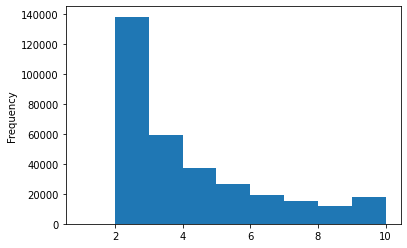

In [16]:
df[df['score'].gt(0.9)]['num_gene_spots'].plot.hist(bins=[1,2,3,4,5,6,7,8,9,10])

In [17]:
df[
    df['score'].lt(-0.9) &
    df['num_gene_spots'].eq(2)
]

metric                                  cell_id annotation  \
23       radial  208216926404047031835800982290964847257       Endo   
28       radial  208216926404047031835800982290964847257       Endo   
172      radial  250861566194391041288206964955187597520      L5_ET   
187      radial   34723182058924265408073791811691302037      L6_IT   
233      radial  211326796842372932268831353486589430307     L56_NP   
...         ...                                      ...        ...   
3864596  radial  262436413820010678079099714625037073568      L5_IT   
3864784  radial  215255702824346314597593563472903651626      L6_IT   
3864796  radial  215255702824346314597593563472903651626      L6_IT   
3864922  radial  278844414162054358509871410043716583275      Pvalb   
3864988  radial  162634102649879497895097294867176080712      Pvalb   

         num_spots     gene  num_gene_spots  score  variance    experiment  \
23             197    Myh14               2 -0.976     0.334  BICCN_mouse1   
28             197   Pdlim5               2 -0.968     0.334  BICCN_mouse1   
172            219    Luzp2               2 -0.946     0.334  BICCN_mouse1   
187            248   Tbc1d4               2 -0.910     0.334  BICCN_mouse1   
233            244    Prr16               2 -0.944     0.334  BICCN_mouse1   
...            ...      ...             ...    ...       ...           ...   
3864596        807   Pou3f1               2 -0.942     0.334  BICCN_mouse1   
3864784        739     Rfx3               2 -0.928     0.334  BICCN_mouse1   
3864796        739    Tunar               2 -0.952     0.334  BICCN_mouse1   
3864922        988  Zfp804b               2 -0.938     0.334  BICCN_mouse1   
3864988       1007   Chrna2               2 -0.912     0.334  BICCN_mouse1   

        sample  
23        m1s1  
28        m1s1  
172       m1s1  
187       m1s1  
233       m1s1  
...        ...  
3864596   m1s4  
3864784   m1s4  
3864796   m1s4  
3864922   m1s4  
3864988   m1s4  

[40597 rows x 10 columns]

0.932


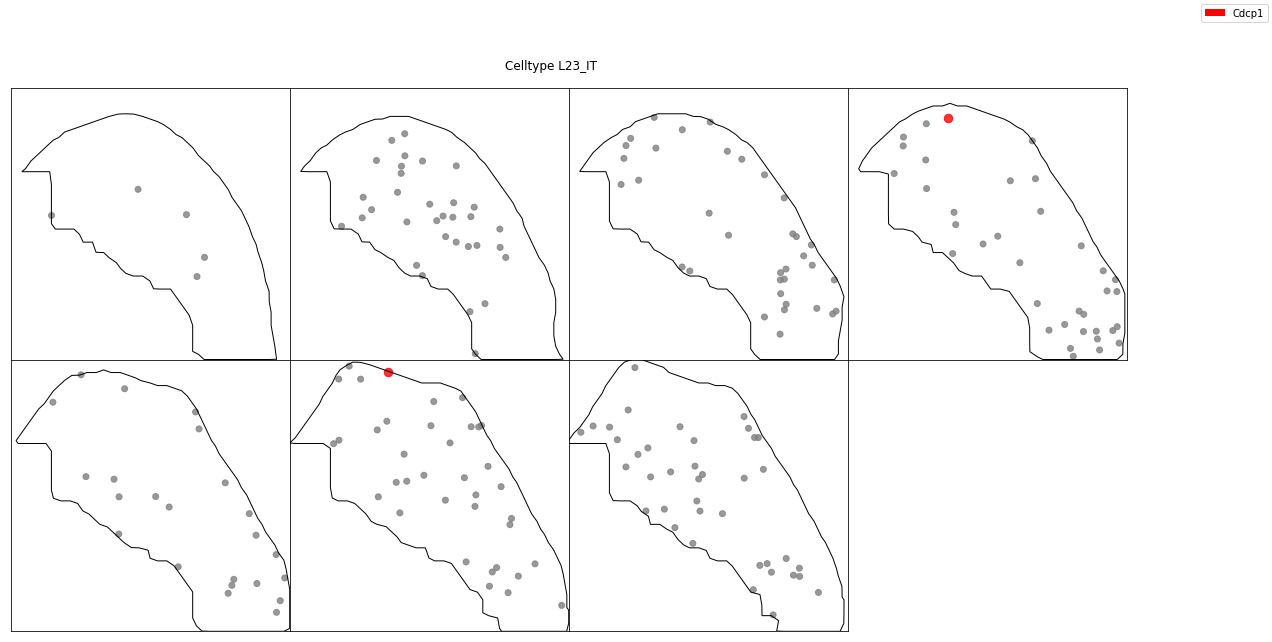

0.992


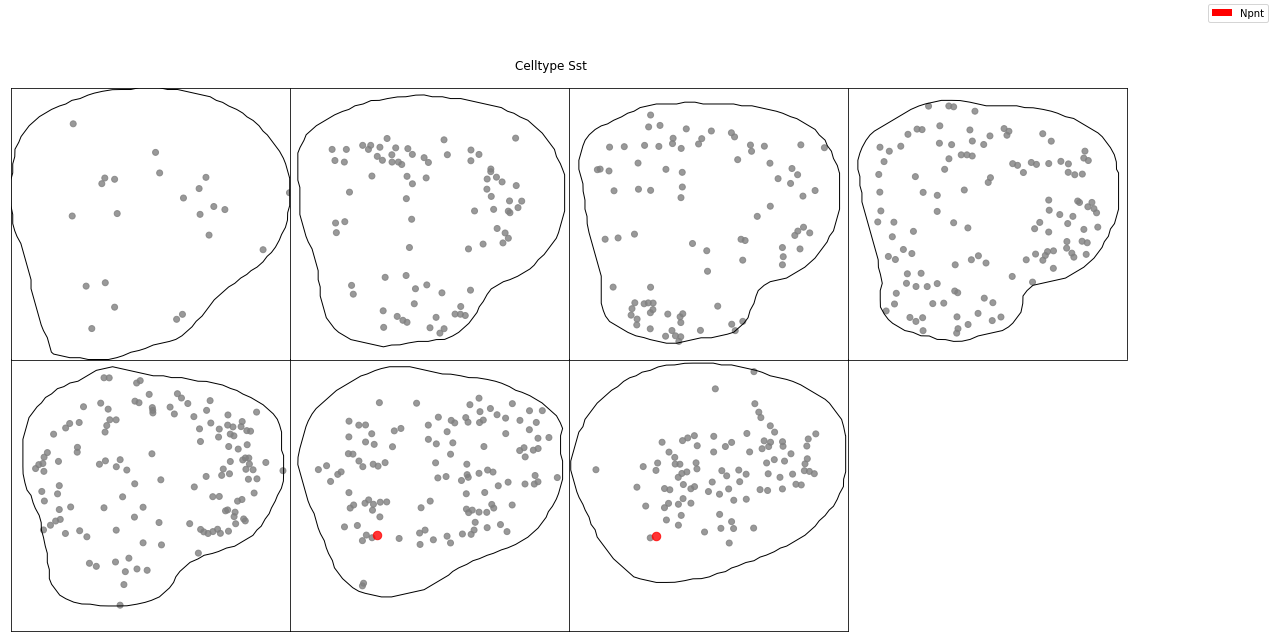

0.996


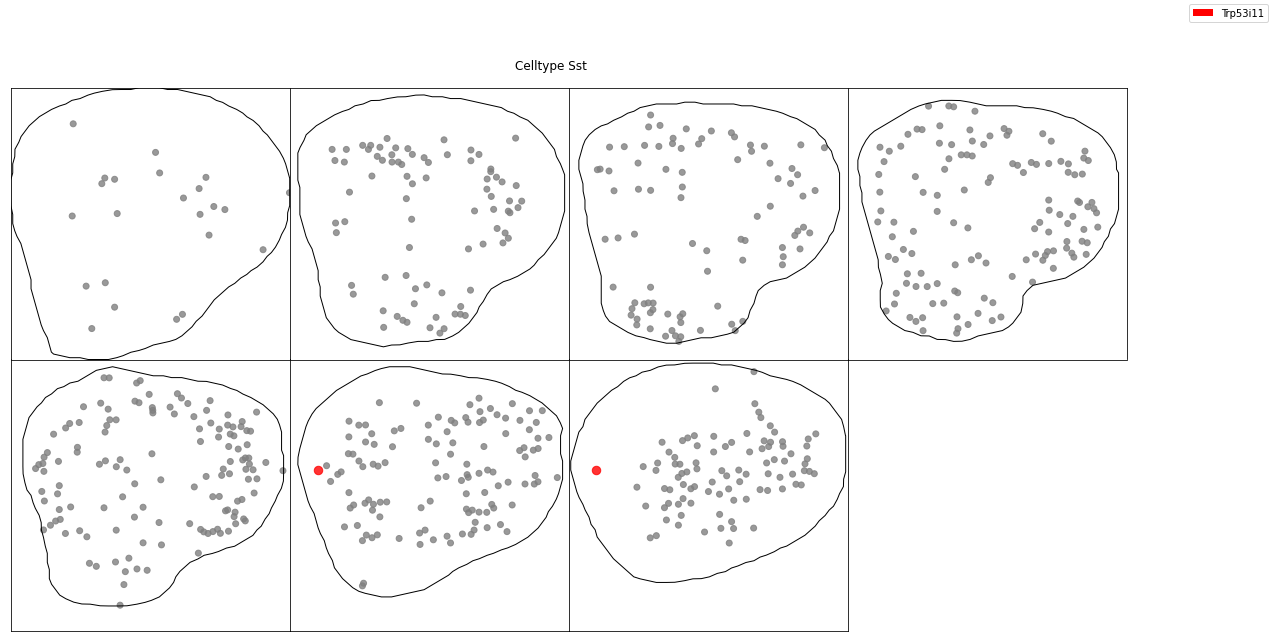

0.9740000000000001


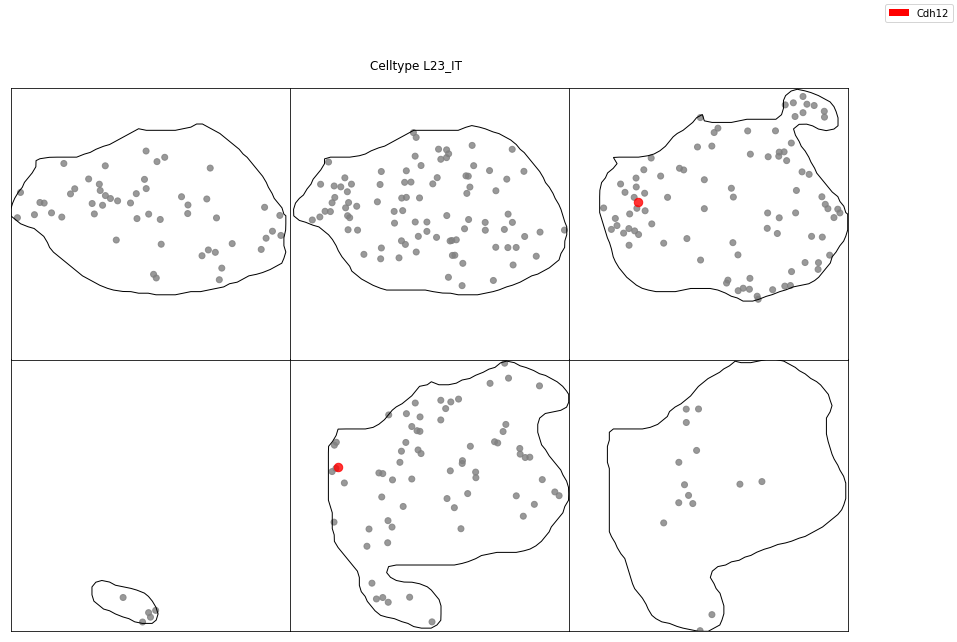

0.9840000000000001


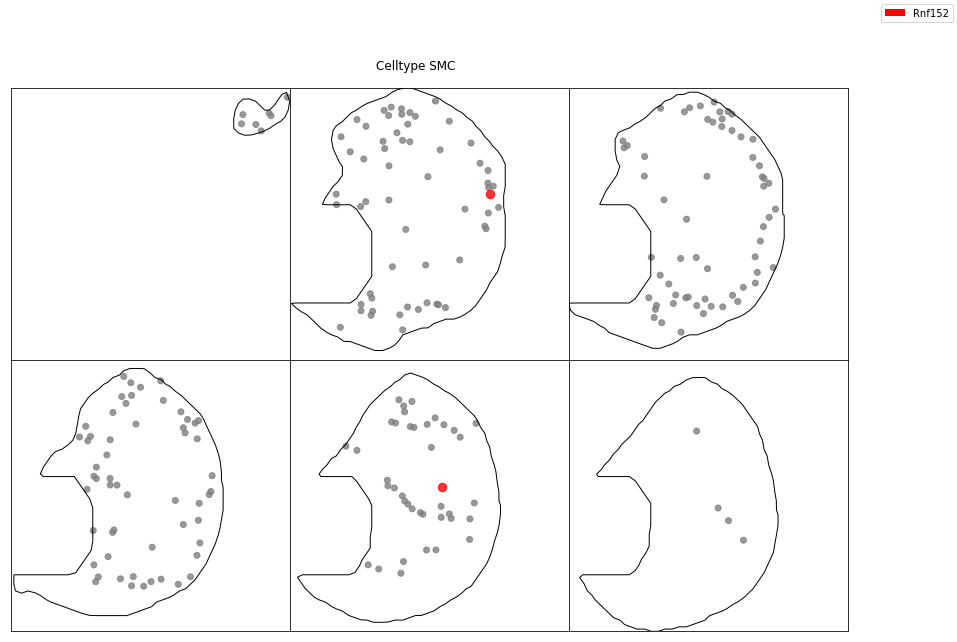

In [19]:
sub_df = df[
    df['score'].gt(0.9) &
    df['sample'].eq('m1s1')
].sort_values('num_gene_spots',ascending=True).head()
sub_df

for i,r in sub_df.iterrows():
    print(r['score'])
    cell = sample.get_cells_by_id([r['cell_id']])[0]
    plotting.plot_cell_zslices(cell, gene_colors={r['gene']:'red'})
    plt.show()
    plt.close()

# Understanding the punctate and radial non-symmetrical issue

In real data there is a strong bias to positive punctate and radial scores, but in the permuted gene-label datasets this trend is not observed.

I think the conclusion is that in real data, RNA molecules cluster with other RNA copies of the same gene more often than expected at random.


In [ ]:
#################################
#
#   Effect on median gene/fraction per ont on score and significance
#
#################################

gene_ont_samples = sorted(glob.glob('../../nf_pipeline/outputs/SRRS_20220531_permuted/gene_ont/*'))

for p in gene_ont_samples:
    df = pd.read_csv(p)
    df['bh_p'] += 1e-8
    
    name = os.path.basename(p).replace('_gene_ont.csv','')
    
    #avoiding -infs by filtering out gene/onts with pvals in the 10th quantile
    p_thresh = df['bh_p'].quantile(0.1)
    vp_df = df.copy()
    vp_df['Spatial significance: -log2(p)'] = -np.log2(vp_df['bh_p'])

    vp_df['med_gene_frac'] = vp_df['med_gene_spots'].div(vp_df['med_spots'])
    
    vp_df.loc[vp_df['med_gene_frac'] < 0.005, 'Median Gene Fraction'] = 'Fewer than 5 in 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.005,0.010), 'Median Gene Fraction'] = 'Between 5 and 10 per 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.010,0.020), 'Median Gene Fraction'] = 'Between 10 and 20 per 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.020,0.030), 'Median Gene Fraction'] = 'Between 20 and 30 per 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.030,0.040), 'Median Gene Fraction'] = 'Between 30 and 40 per 1000'
    vp_df['Cells per gene/ont'] = vp_df['Median Gene Fraction'].fillna('More than 40 per 1000')

    hue_order = [
        'Fewer than 5 in 1000',
        'Between 5 and 10 per 1000',
        'Between 10 and 20 per 1000',
        'Between 20 and 30 per 1000',
        'Between 30 and 40 per 1000',
        'More than 40 per 1000',
    ]


    g = sns.JointGrid(marginal_ticks=True)

    sns.scatterplot(
        x = 'med_score',
        y = 'Spatial significance: -log2(p)',
        hue = 'Median Gene Fraction',
        hue_order = hue_order,
        palette = 'viridis',
        alpha = 0.1,
        data = vp_df,
        legend = False,
        ax = g.ax_joint,
    )

    sns.ecdfplot(
        x = 'med_score',
        hue = 'Median Gene Fraction',
        hue_order = hue_order,
        palette = 'viridis',
        data = vp_df,
        legend = False,
        ax=g.ax_marg_x,
    )

    sns.ecdfplot(
        y = 'Spatial significance: -log2(p)',
        hue = 'Median Gene Fraction',
        hue_order = hue_order,
        palette = 'viridis',
        data = vp_df,
        #legend = False,
        ax=g.ax_marg_y,
    )

    #Show significance cutoff line -np.log2(0.05) ~= 4.32
    g.ax_joint.axhline(4.32, linestyle = 'dashed', color = 'grey')
    g.ax_marg_y.axhline(4.32, linestyle = 'dashed', color = 'grey')
    g.ax_marg_y.axvline(0.5, linestyle = 'dashed', color = 'grey')

    #Vertical line at 0 median score
    g.ax_joint.axvline(0, linestyle = 'dashed', color = 'grey')
    g.ax_marg_x.axvline(0, linestyle = 'dashed', color = 'grey')
    g.ax_marg_x.axhline(0.5, linestyle = 'dashed', color = 'grey')


    g.fig.suptitle(
        """{}
        """.format(name)
    )
    g.fig.subplots_adjust(top=0.85)
    g.ax_joint.set_xlabel('Median periphery score per gene/ontology')
    g.ax_joint.spines['left'].set_visible(False)

    #g.savefig('tpm_spatial_corrs/expressed_vs_unexpressed_peripheral_scoring_ecdf.svg')
    sns.move_legend(g.ax_marg_y, "upper left", bbox_to_anchor=(1, 1))
    plt.show(g)
    plt.close()
    
  

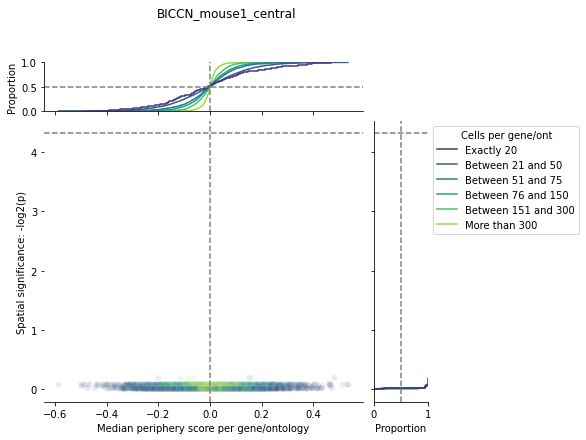

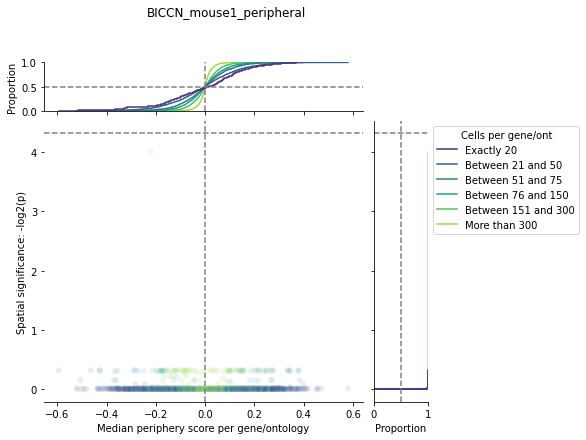

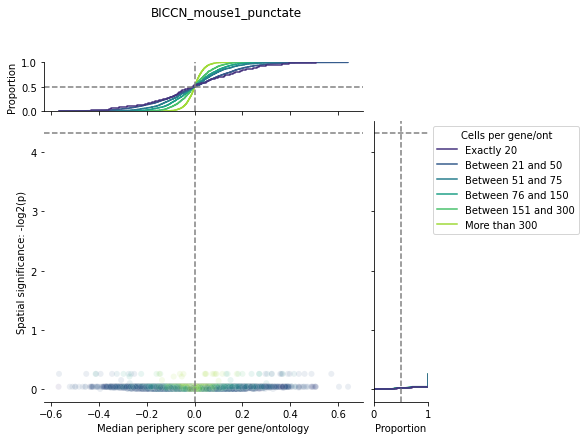

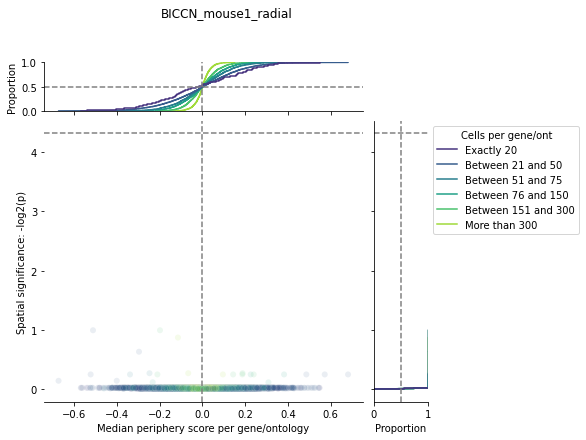

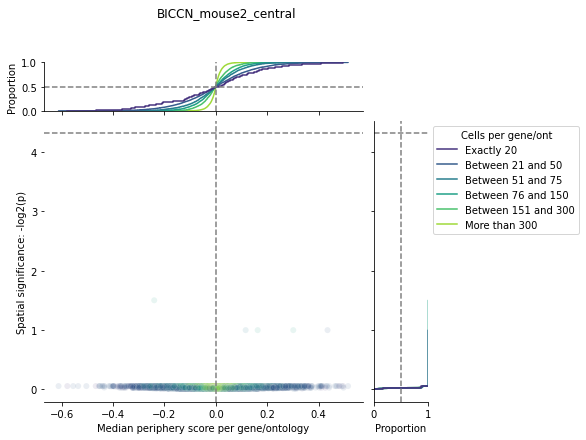

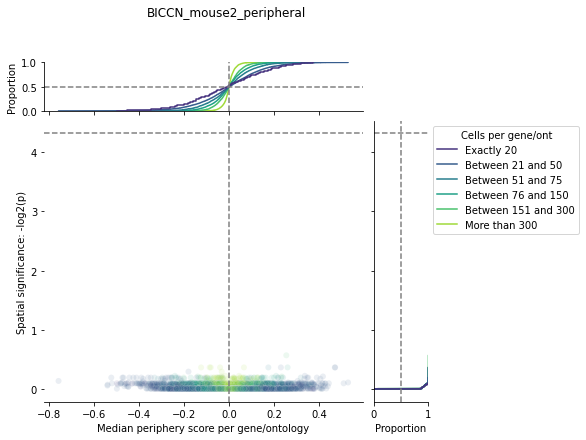

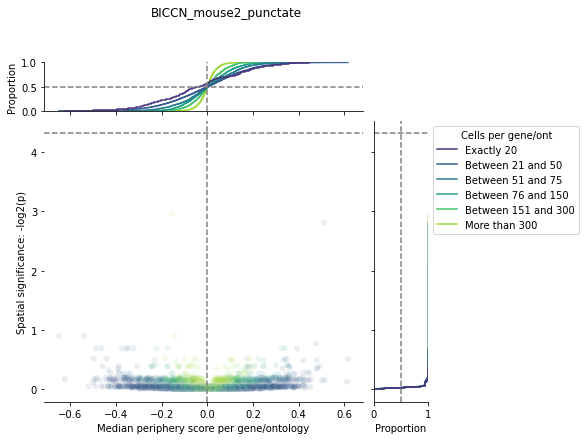

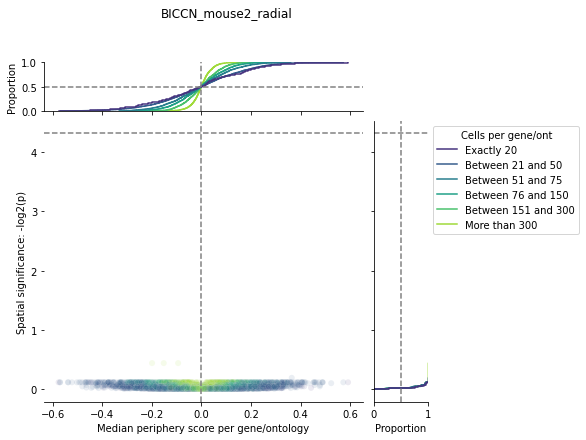

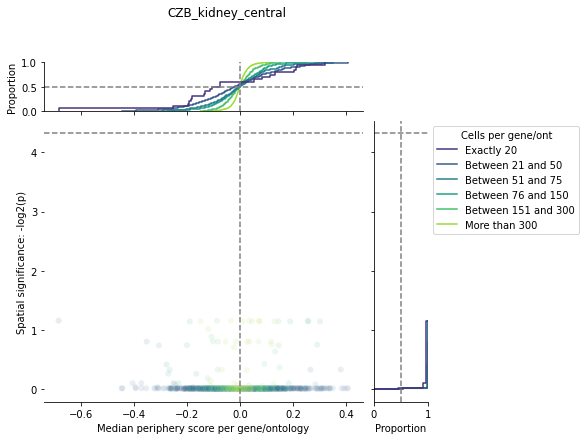

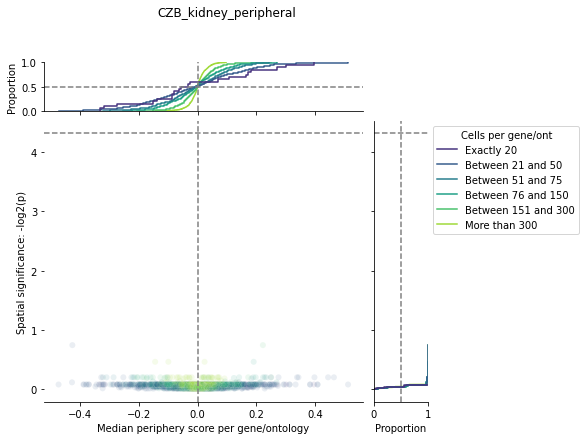

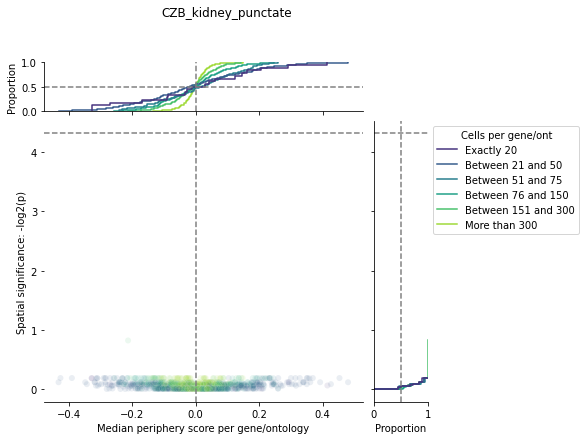

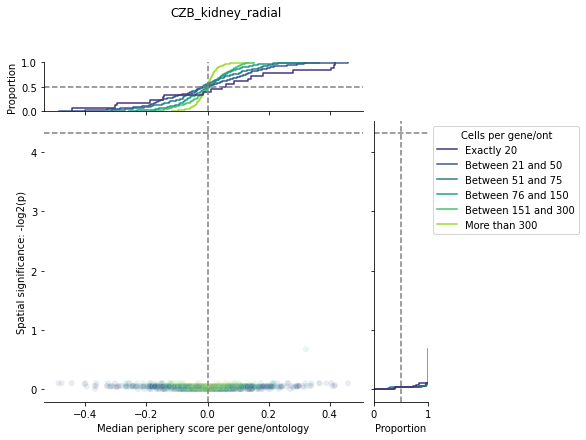

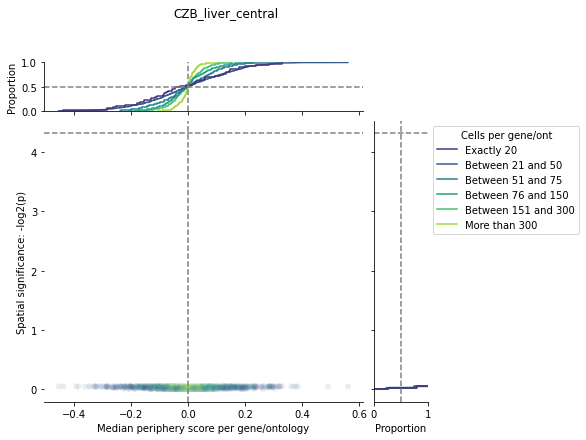

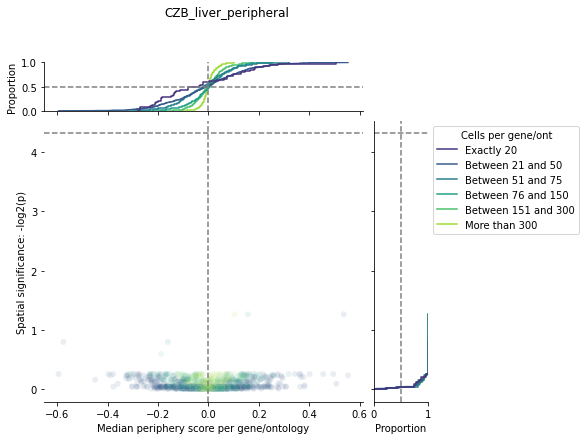

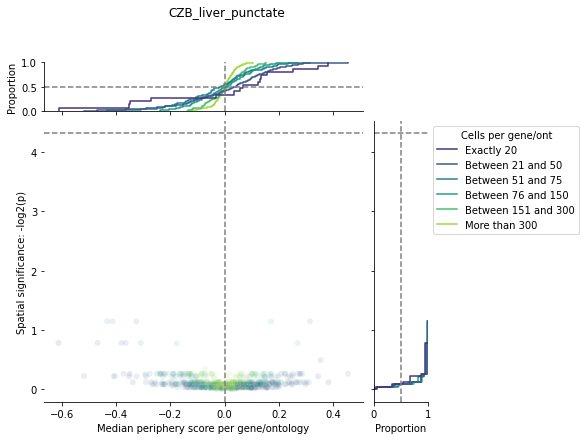

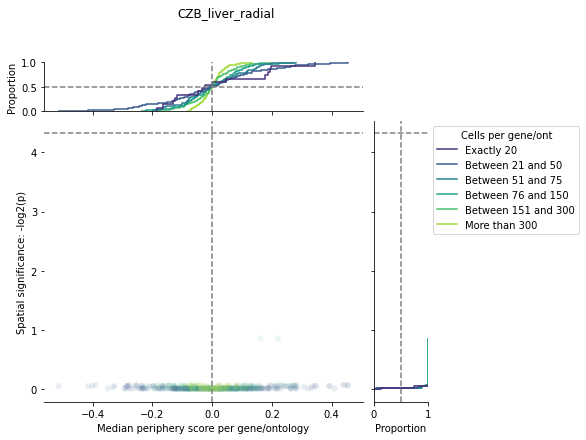

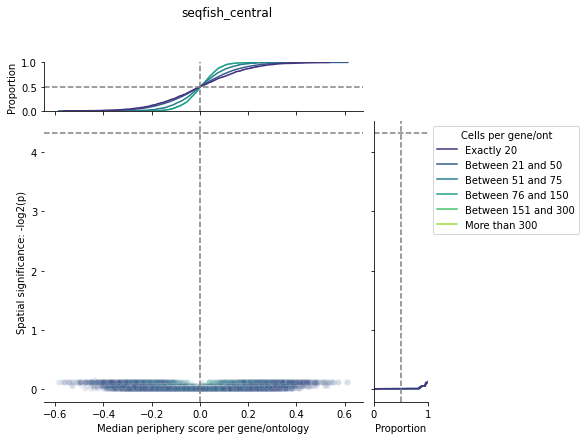

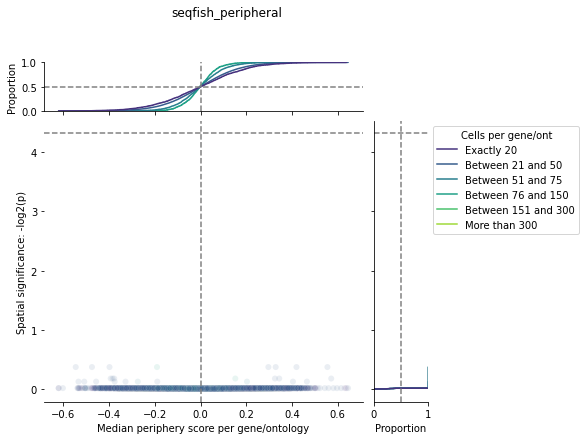

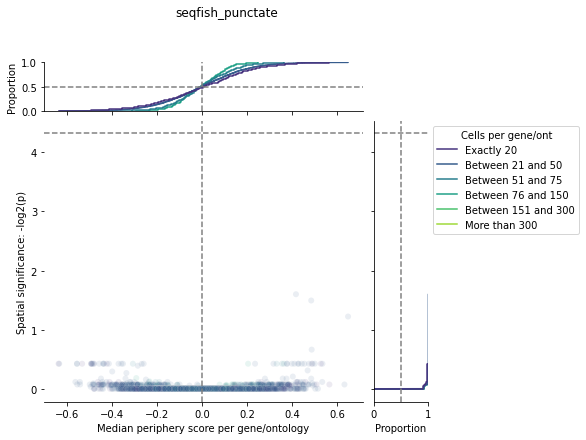

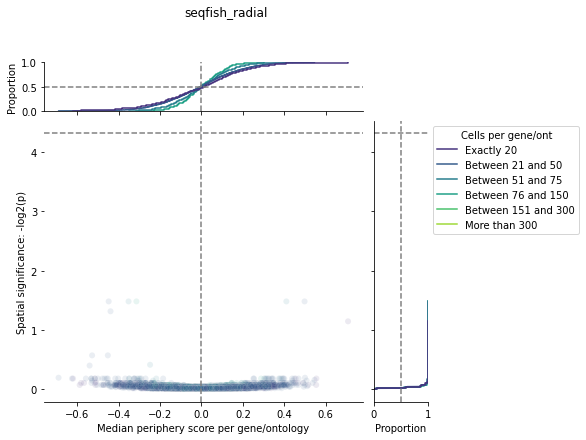

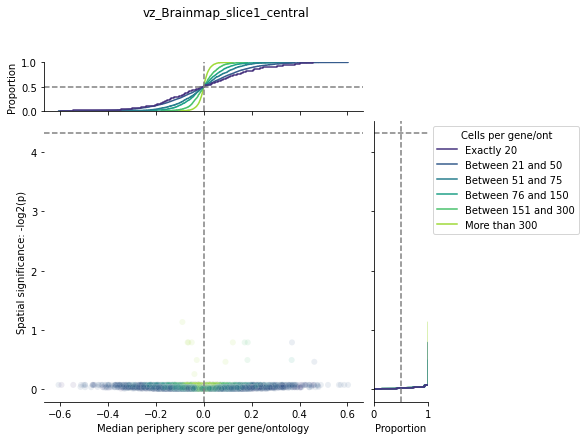

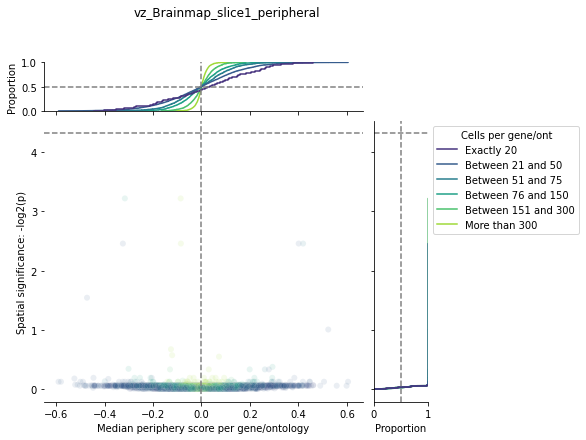

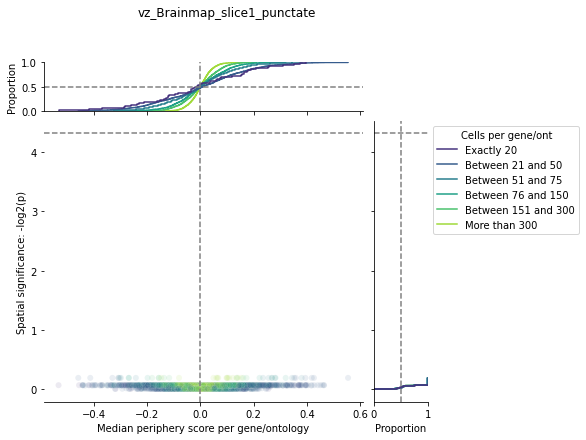

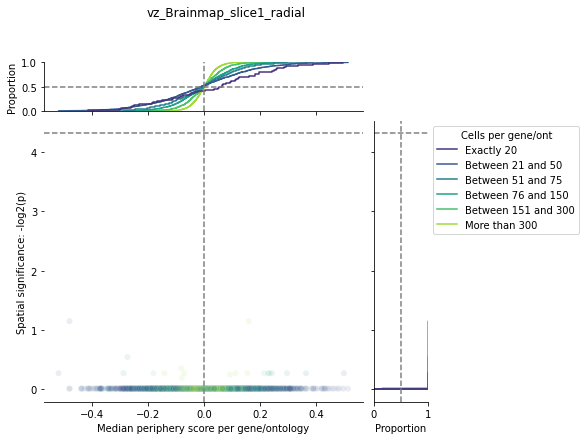

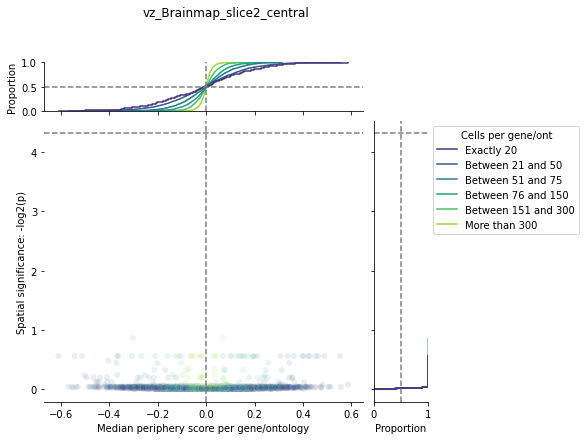

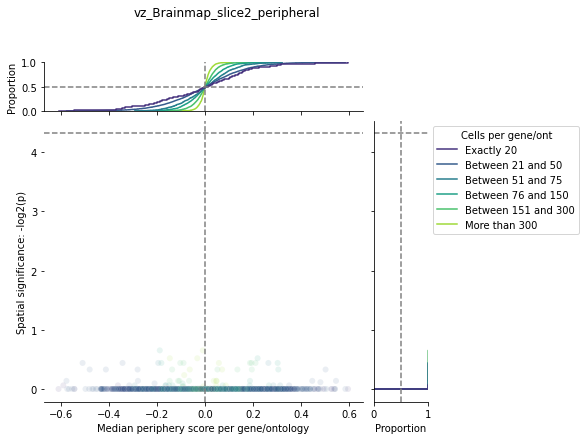

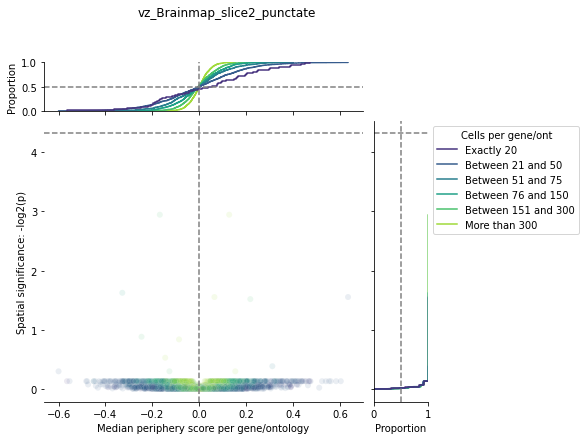

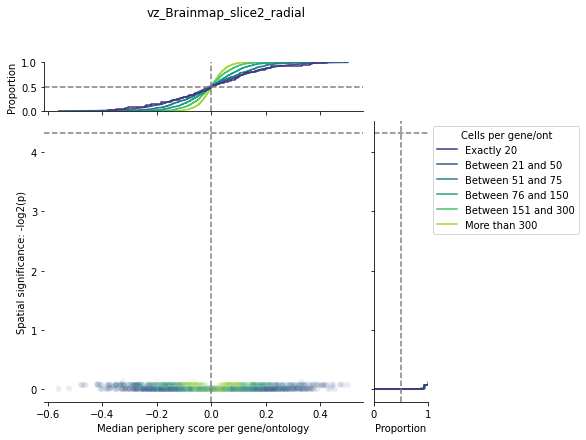

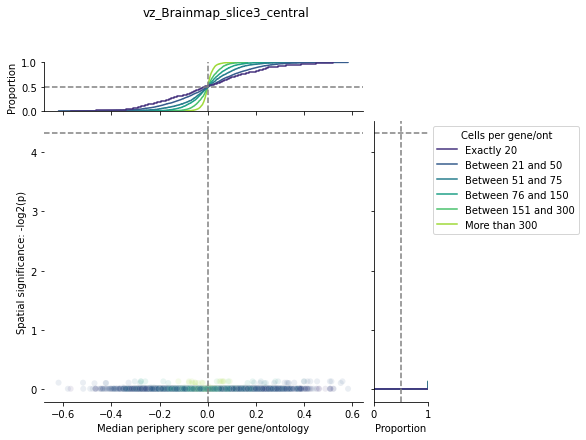

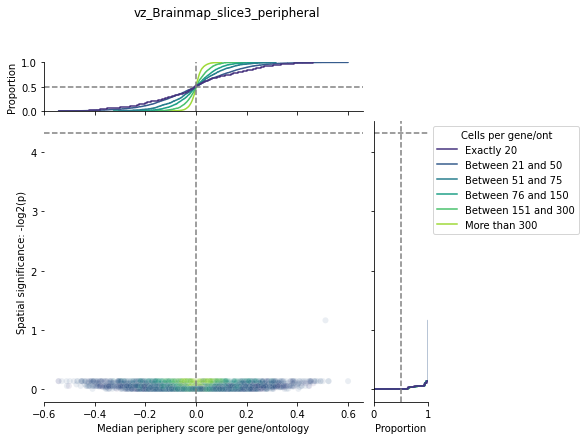

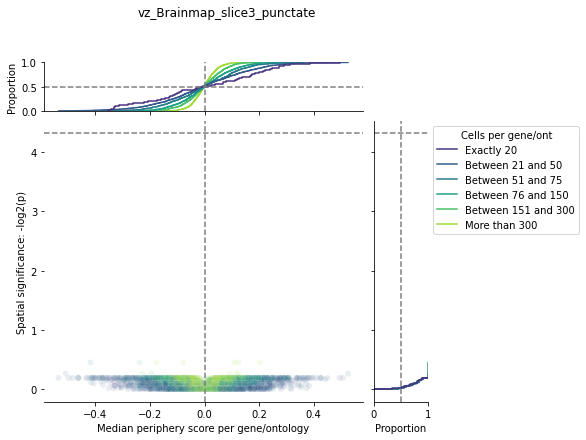

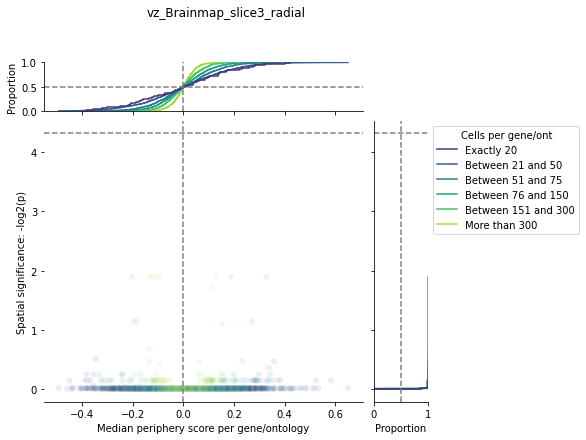

In [34]:
#################################
#
#   Effect on cells per ont on score and significance
#
#################################

gene_ont_samples = sorted(glob.glob('../../nf_pipeline/outputs/SRRS_20220531_permuted/gene_ont/*.csv'))

for p in gene_ont_samples:
    name = os.path.basename(p).replace('_gene_ont.csv','')
    
    df = pd.read_csv(p)
    df['bh_p'] += 1e-8
    
    vp_df = df.copy()
    vp_df['Spatial significance: -log2(p)'] = -np.log2(vp_df['bh_p']) 

    vp_df.loc[vp_df['num_cells'] == 20, 'Cells per gene/ont'] = 'Exactly 20'
    vp_df.loc[vp_df['num_cells'].between(21,50), 'Cells per gene/ont'] = 'Between 21 and 50'
    vp_df.loc[vp_df['num_cells'].between(51,75), 'Cells per gene/ont'] = 'Between 51 and 75'
    vp_df.loc[vp_df['num_cells'].between(76,150), 'Cells per gene/ont'] = 'Between 76 and 150'
    vp_df.loc[vp_df['num_cells'].between(151,300), 'Cells per gene/ont'] = 'Between 151 and 300'
    vp_df['Cells per gene/ont'] = vp_df['Cells per gene/ont'].fillna('More than 300')

    hue_order = [
        'Exactly 20',
        'Between 21 and 50',
        'Between 51 and 75',
        'Between 76 and 150',
        'Between 151 and 300',
        'More than 300',
    ]


    g = sns.JointGrid(marginal_ticks=True)

    sns.scatterplot(
        x = 'med_score',
        y = 'Spatial significance: -log2(p)',
        hue = 'Cells per gene/ont',
        hue_order = hue_order,
        palette = 'viridis',
        alpha = 0.1,
        data = vp_df,
        legend = False,
        ax = g.ax_joint,
    )

    sns.ecdfplot(
        x = 'med_score',
        hue = 'Cells per gene/ont',
        hue_order = hue_order,
        palette = 'viridis',
        data = vp_df,
        legend = False,
        ax=g.ax_marg_x,
    )

    sns.ecdfplot(
        y = 'Spatial significance: -log2(p)',
        hue = 'Cells per gene/ont',
        hue_order = hue_order,
        palette = 'viridis',
        data = vp_df,
        #legend = False,
        ax=g.ax_marg_y,
    )

    #Show significance cutoff line -np.log2(0.05) ~= 4.32
    g.ax_joint.axhline(4.32, linestyle = 'dashed', color = 'grey')
    g.ax_marg_y.axhline(4.32, linestyle = 'dashed', color = 'grey')

    #Vertical line at 0 median score
    g.ax_joint.axvline(0, linestyle = 'dashed', color = 'grey')
    g.ax_marg_x.axvline(0, linestyle = 'dashed', color = 'grey')

    #Lines at 0.5 in the margins for the eCDFs
    g.ax_marg_x.axhline(0.5, linestyle = 'dashed', color = 'grey')
    g.ax_marg_y.axvline(0.5, linestyle = 'dashed', color = 'grey')

    g.fig.suptitle(
        """{}
        """.format(name)
    )
    g.fig.subplots_adjust(top=0.85)
    g.ax_joint.set_xlabel('Median periphery score per gene/ontology')
    g.ax_joint.spines['left'].set_visible(False)

    #g.savefig('tpm_spatial_corrs/expressed_vs_unexpressed_peripheral_scoring_ecdf.svg')
    sns.move_legend(g.ax_marg_y, "upper left", bbox_to_anchor=(1, 1))
    plt.show(g)
    plt.close()
    

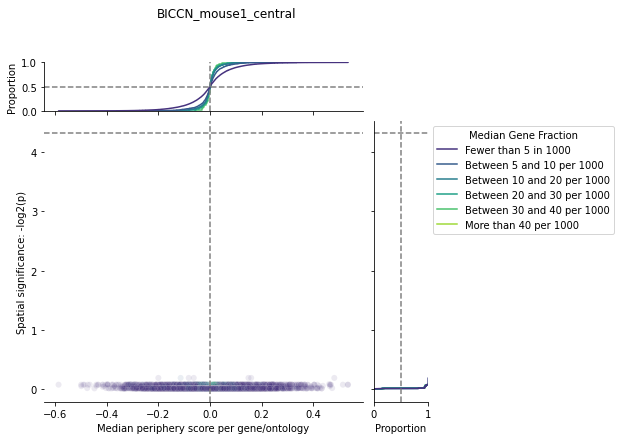

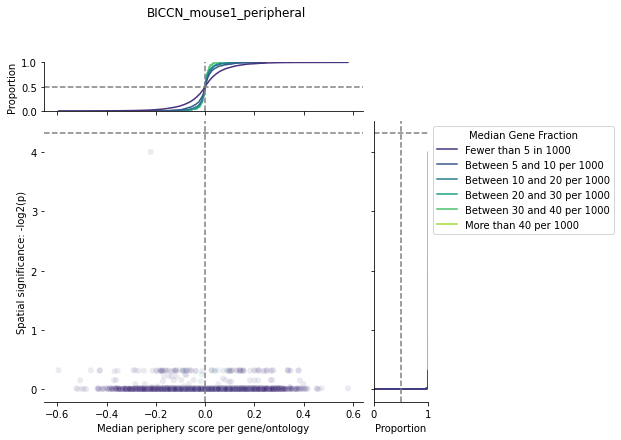

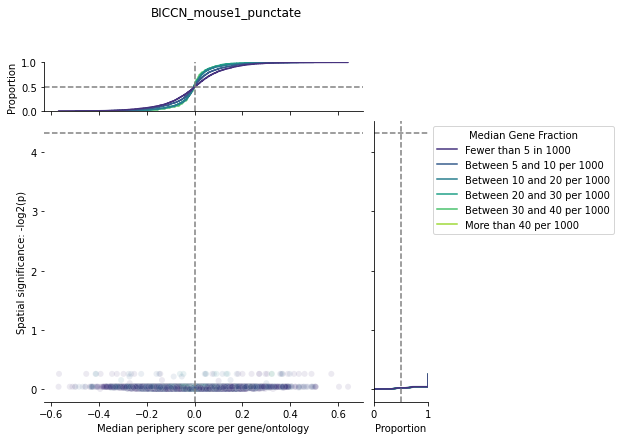

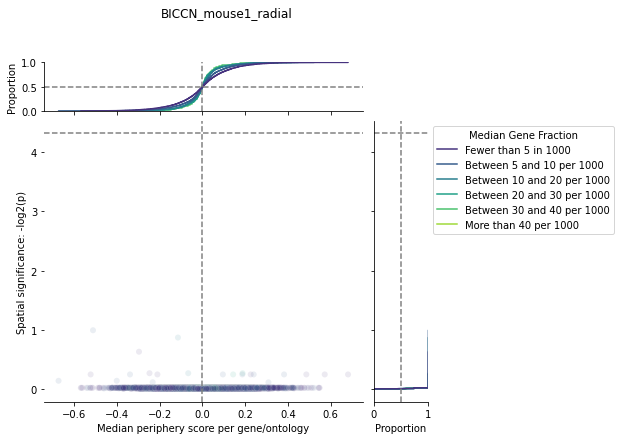

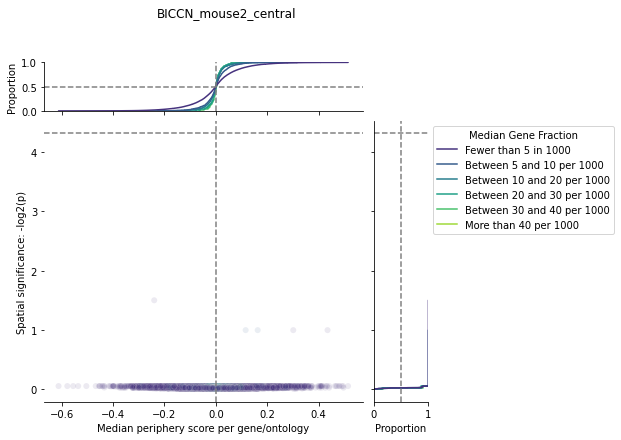

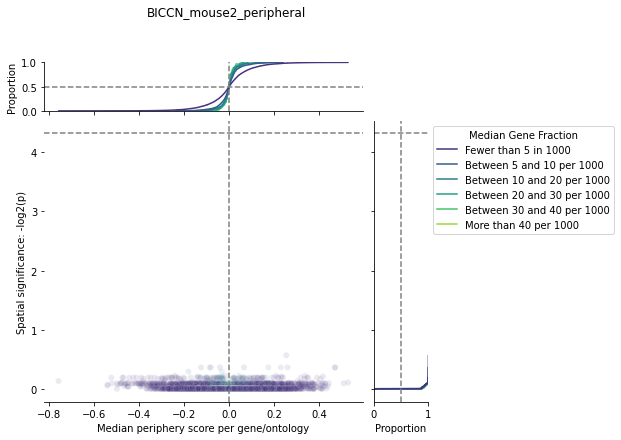

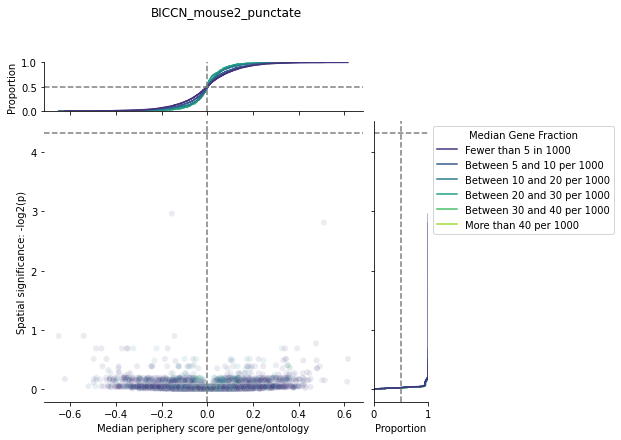

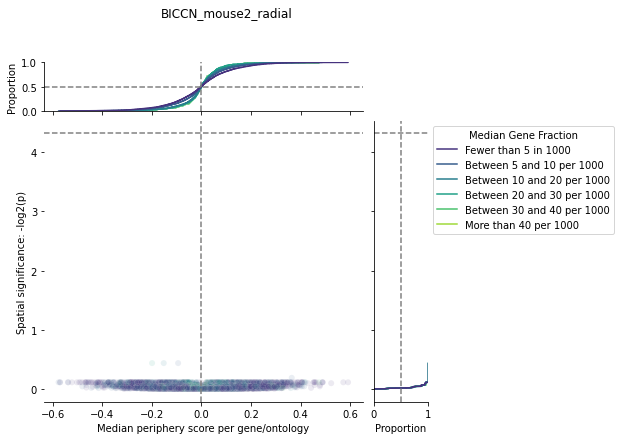

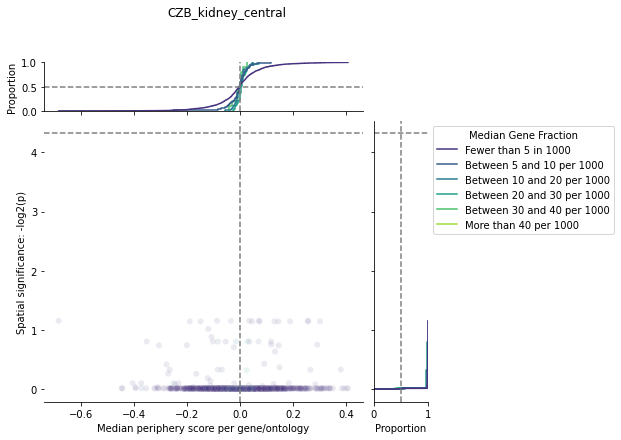

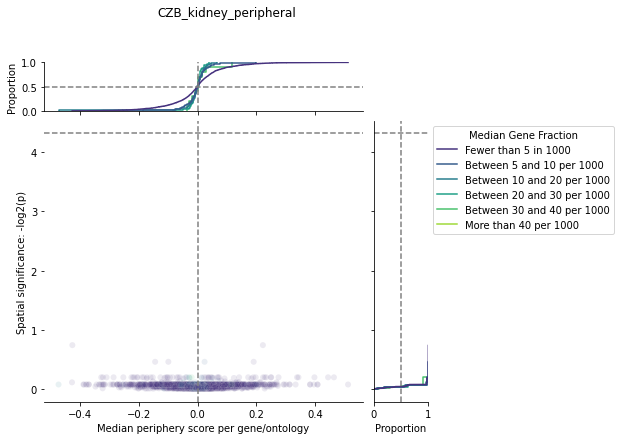

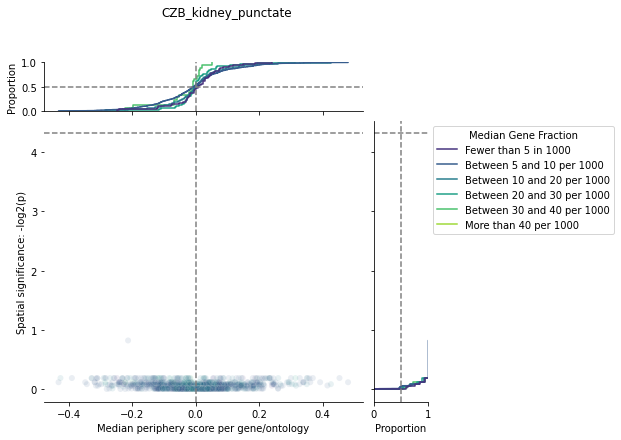

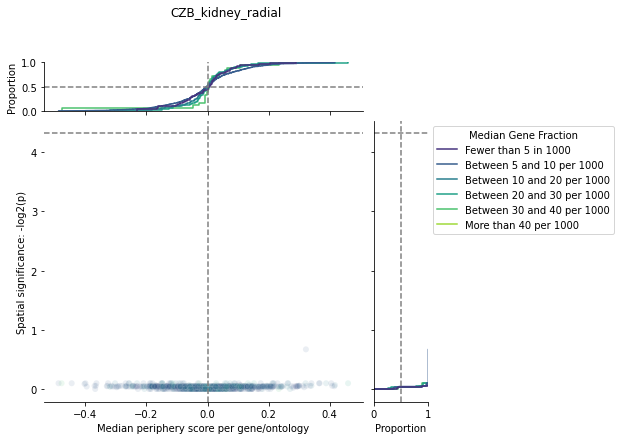

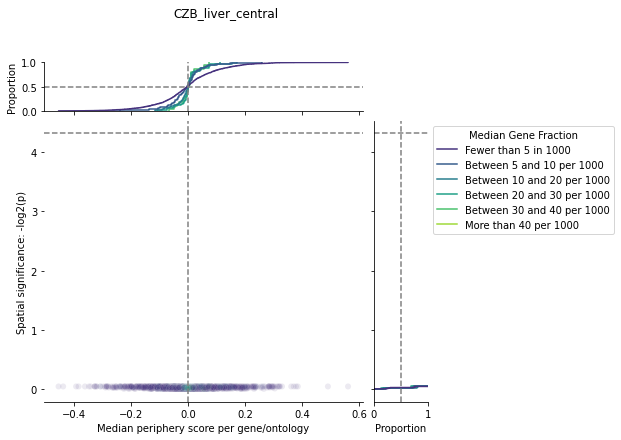

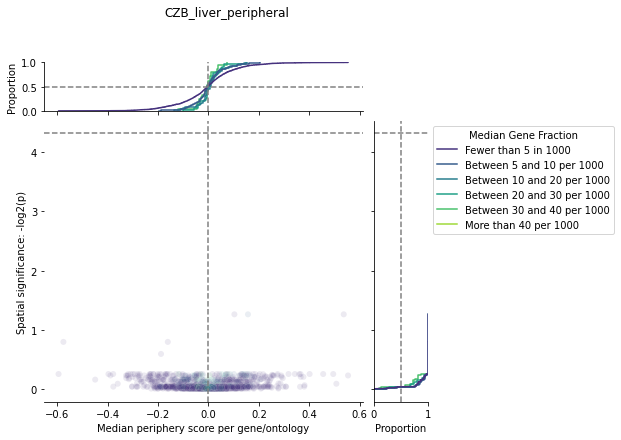

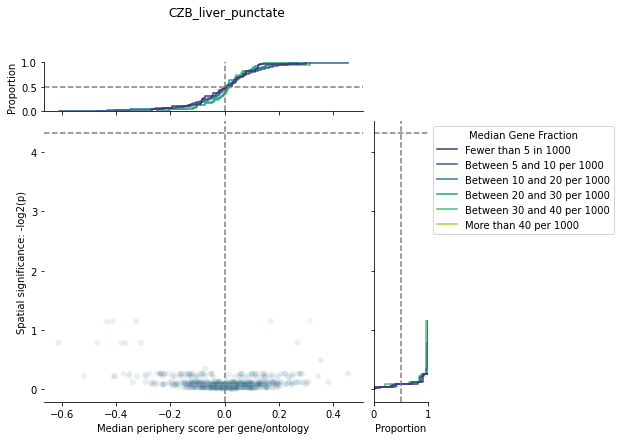

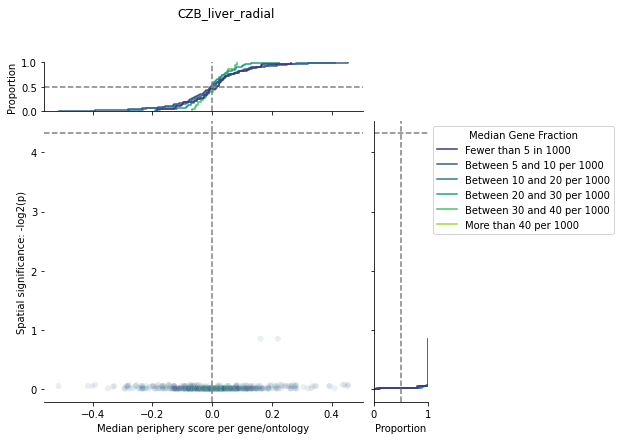

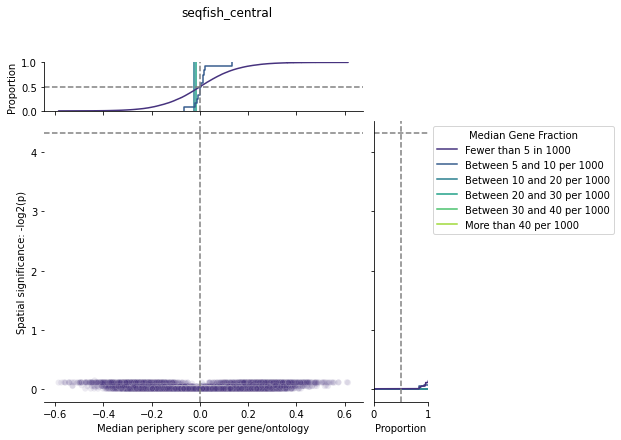

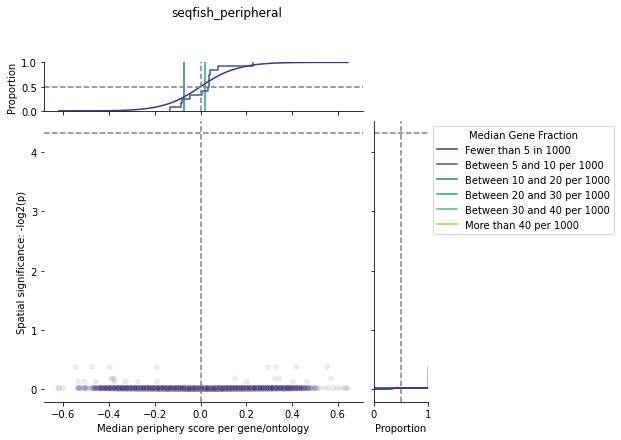

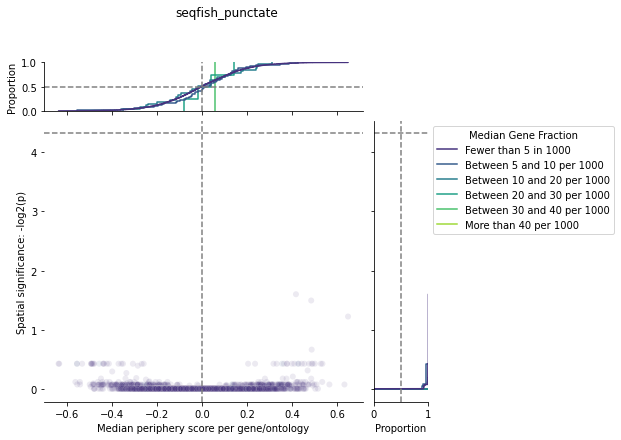

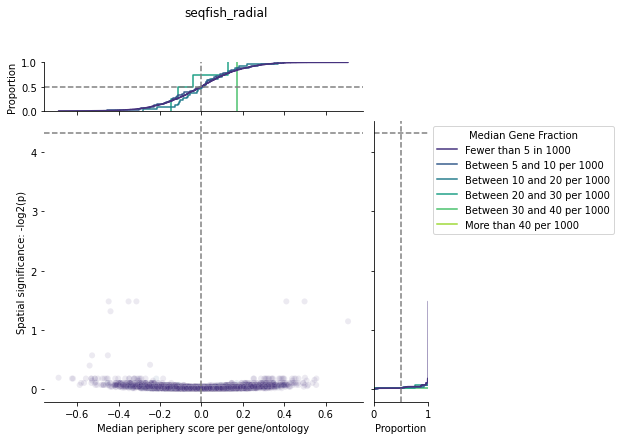

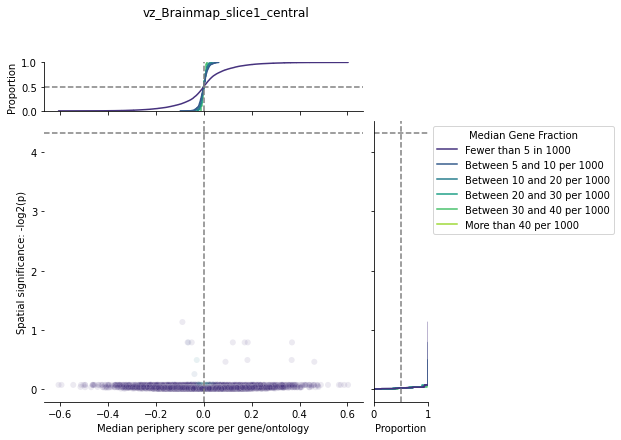

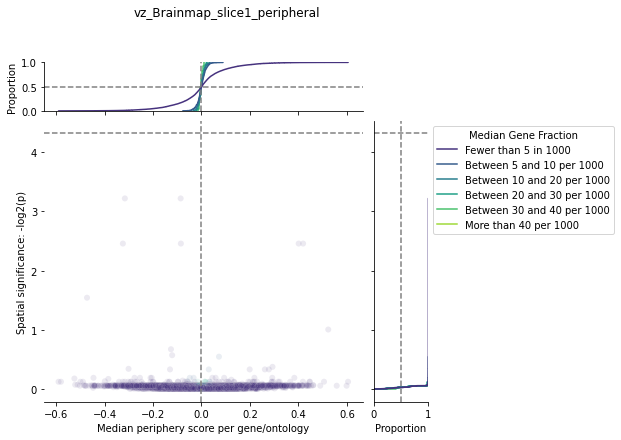

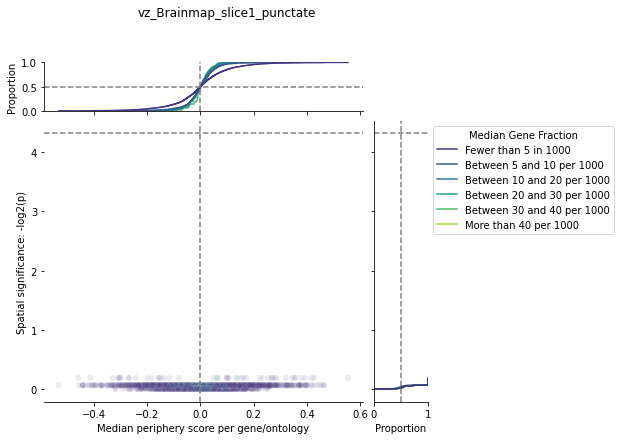

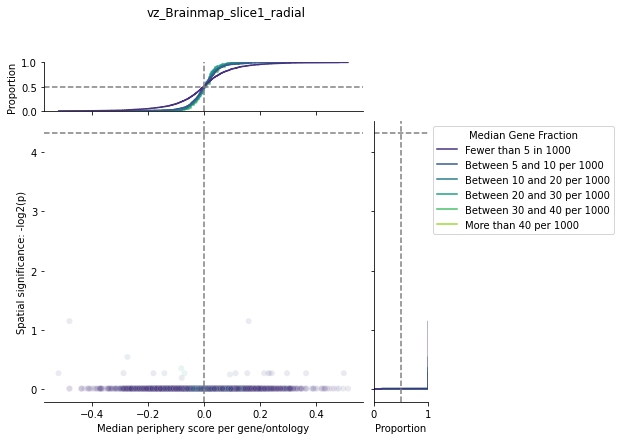

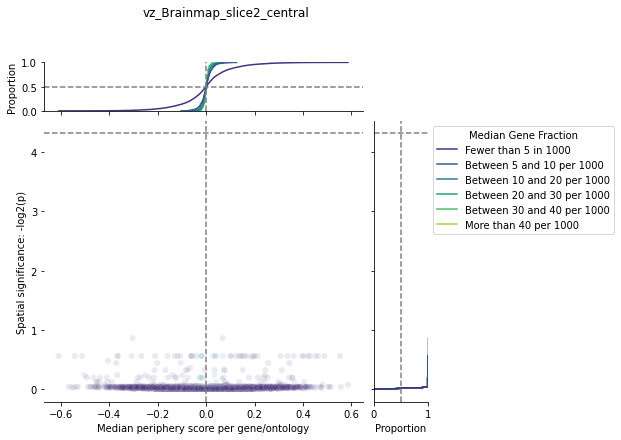

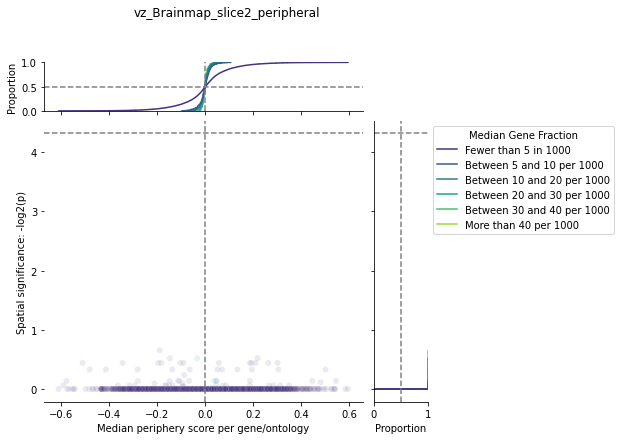

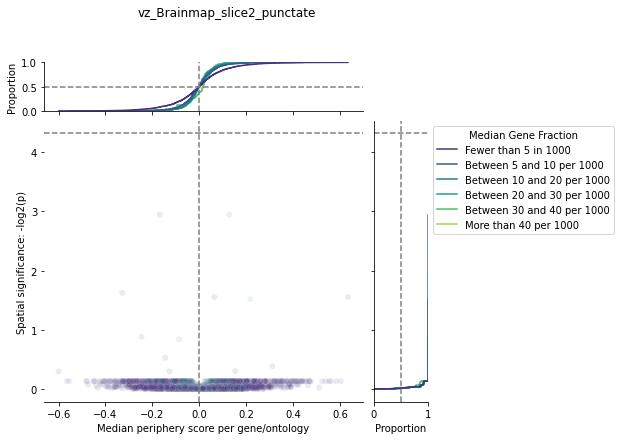

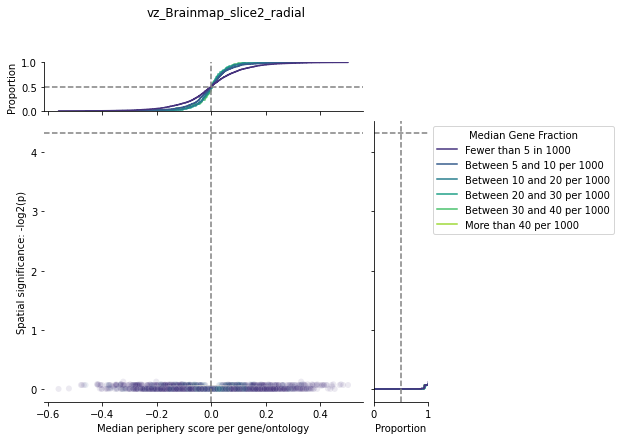

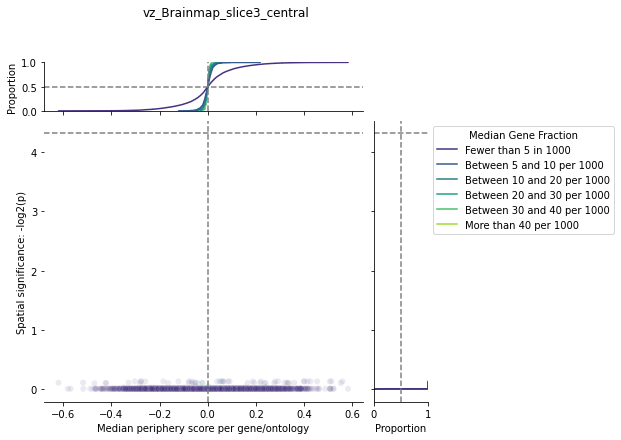

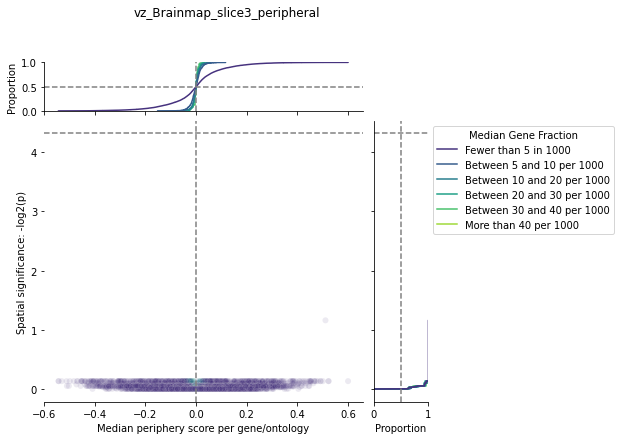

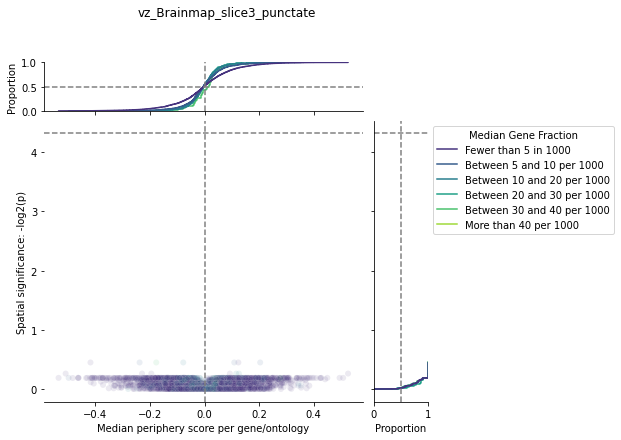

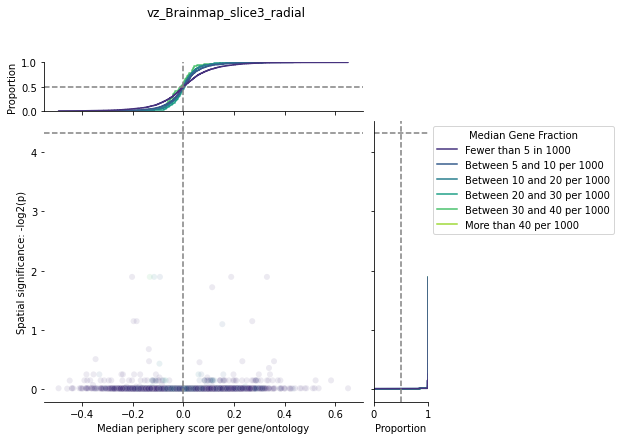

In [33]:
#################################
#
#   Effect on median gene/fraction per ont on score and significance
#
#################################

gene_ont_samples = sorted(glob.glob('../../nf_pipeline/outputs/SRRS_20220531_permuted/gene_ont/*'))

for p in gene_ont_samples:
    df = pd.read_csv(p)
    df['bh_p'] += 1e-8
    
    name = os.path.basename(p).replace('_gene_ont.csv','')
    
    #avoiding -infs by filtering out gene/onts with pvals in the 10th quantile
    p_thresh = df['bh_p'].quantile(0.1)
    vp_df = df.copy()
    vp_df['Spatial significance: -log2(p)'] = -np.log2(vp_df['bh_p'])

    vp_df['med_gene_frac'] = vp_df['med_gene_spots'].div(vp_df['med_spots'])
    
    vp_df.loc[vp_df['med_gene_frac'] < 0.005, 'Median Gene Fraction'] = 'Fewer than 5 in 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.005,0.010), 'Median Gene Fraction'] = 'Between 5 and 10 per 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.010,0.020), 'Median Gene Fraction'] = 'Between 10 and 20 per 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.020,0.030), 'Median Gene Fraction'] = 'Between 20 and 30 per 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.030,0.040), 'Median Gene Fraction'] = 'Between 30 and 40 per 1000'
    vp_df['Cells per gene/ont'] = vp_df['Median Gene Fraction'].fillna('More than 40 per 1000')

    hue_order = [
        'Fewer than 5 in 1000',
        'Between 5 and 10 per 1000',
        'Between 10 and 20 per 1000',
        'Between 20 and 30 per 1000',
        'Between 30 and 40 per 1000',
        'More than 40 per 1000',
    ]


    g = sns.JointGrid(marginal_ticks=True)

    sns.scatterplot(
        x = 'med_score',
        y = 'Spatial significance: -log2(p)',
        hue = 'Median Gene Fraction',
        hue_order = hue_order,
        palette = 'viridis',
        alpha = 0.1,
        data = vp_df,
        legend = False,
        ax = g.ax_joint,
    )

    sns.ecdfplot(
        x = 'med_score',
        hue = 'Median Gene Fraction',
        hue_order = hue_order,
        palette = 'viridis',
        data = vp_df,
        legend = False,
        ax=g.ax_marg_x,
    )

    sns.ecdfplot(
        y = 'Spatial significance: -log2(p)',
        hue = 'Median Gene Fraction',
        hue_order = hue_order,
        palette = 'viridis',
        data = vp_df,
        #legend = False,
        ax=g.ax_marg_y,
    )

    #Show significance cutoff line -np.log2(0.05) ~= 4.32
    g.ax_joint.axhline(4.32, linestyle = 'dashed', color = 'grey')
    g.ax_marg_y.axhline(4.32, linestyle = 'dashed', color = 'grey')
    g.ax_marg_y.axvline(0.5, linestyle = 'dashed', color = 'grey')

    #Vertical line at 0 median score
    g.ax_joint.axvline(0, linestyle = 'dashed', color = 'grey')
    g.ax_marg_x.axvline(0, linestyle = 'dashed', color = 'grey')
    g.ax_marg_x.axhline(0.5, linestyle = 'dashed', color = 'grey')


    g.fig.suptitle(
        """{}
        """.format(name)
    )
    g.fig.subplots_adjust(top=0.85)
    g.ax_joint.set_xlabel('Median periphery score per gene/ontology')
    g.ax_joint.spines['left'].set_visible(False)

    #g.savefig('tpm_spatial_corrs/expressed_vs_unexpressed_peripheral_scoring_ecdf.svg')
    sns.move_legend(g.ax_marg_y, "upper left", bbox_to_anchor=(1, 1))
    plt.show(g)
    plt.close()
    
  